## BANK MARKETING

Projet réalisé par :
* Arnaud Leleu
* Camille Kienlen
* Clément Guillet
* Julien Musschoot

### INTRODUCTION AU PROJET

In [22]:
#!/usr/bin/env python3

# Import des librairies

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool

from IPython.display import Markdown
from IPython.display import Image

from pathlib import Path

project_root = Path('.')
data_path = project_root / 'data'
build_path = project_root / 'build'
build_path.mkdir(exist_ok=True)
build_df_path = build_path / 'df'
build_df_path.mkdir(exist_ok=True)
build_graphs_path = build_path / 'graphs'
build_graphs_path.mkdir(exist_ok=True)
build_ml_path = build_path / 'ml'
build_ml_path.mkdir(exist_ok=True)
pages_path = project_root / 'pages'
projet_path = pages_path / '1-projet'
donnees_path = pages_path / '2-donnees'
visu_path = pages_path / '3-visu'
modelisation_path = pages_path / '4-modelisation'
ml_path = pages_path / '5-ml'
conclusion_path = pages_path / '6-conclusion'

# Exploitation d'un fichier .md pour la page de présentation du projet
txt_projet = open(projet_path / 'contexte_et_objectifs.md').read()

# Fichiers exploités sur la page de présentation du jeu de données
txt_cadre = open(donnees_path / 'cadre.md').read()
txt_pertinence = open(donnees_path / 'pertinence.md').read()
df_pertinence = pd.read_csv(donnees_path / "tableau_variables.csv", sep = ";", index_col=0, lineterminator="\n")
txt_conclusion_prepocess = open(donnees_path / 'conclusion_preprocess.md').read()

# Fichiers exploités pour la page de modélisation du projet
txt_classif_choix = open(modelisation_path / 'classification_choix.md').read()
txt_interpretation = open(modelisation_path / 'interpretation.md').read()


separation = "--------------------------------------------------------"

In [23]:
display(Markdown(txt_projet))

#### Contexte

##### Contexte d’insertion du projet dans votre métier ou intérêts professionnels

Le projet « bank marketing » nous présente en tant que data analystes pour une banque. La direction de la société nous demande de trouver les meilleures stratégies pour améliorer les prochaines campagnes marketing. Sur la base des informations collectées lors de la dernière campagne, nous devrons identifier les modèles les plus efficaces pour atteindre un objectif bien précis, le succès d’une future campagne de souscription.

Ce projet permet de conjuguer l’analyse avancée de données avec une compréhension approfondie d’enjeux économiques et financiers pour la banque. L’idée est d’améliorer les processus et de fournir à la direction des recommandations stratégiques visant à favoriser la réussite globale de l'entreprise.

##### Dimension Technique

**Utilisation de Python de A à Z :** Nous utiliserons Python au maximum des concepts que nous avons appris pendant notre formation, avec des bibliothèques telles que Pandas pour le traitement des données, Seaborn et Matplotlib pour la visualisation des résultats, et Scikit-learn pour l’analyse prédictive.

Nous articulerons notre progression autour de quatre thèmes principaux.

1. Préparation et nettoyage des données :
    * Traitement des valeurs manquantes : identifier et corriger les données manquantes pour éviter les biais dans le modèle (utilisation de médianes, moyennes, imputation des k proches…)
    * Encodage des variables catégorielles : convertir les variables qualitatives en formats numériques adaptés aux algorithmes de Machine Learning (one hot, label encoding, ordinal encoding)
    * Ajustement des variables : normaliser ou standardiser les variables pour assurer une cohérence dans la modélisation.
2. Analyse exploratoire des données :
    * Identification des schémas : analyser les distributions des données pour détecter des motifs récurrents et des tendances significatives.
    * Exploration des relations : utiliser des visualisations et des statistiques descriptives pour examiner les corrélations entre les variables explicatives et la variable cible (histogrammes, boxplots, heatmaps…).
3. Modélisation prédictive :
    * Sélection et entrainement des modèles : tester et entraîner divers algorithmes de Machine Learning pour déterminer le modèle le plus performant (forêts aléatoires, régressions logistiques, classificateur d’arbre de décision…).
    * Évaluation des performances : mesurer l'efficacité des modèles à l'aide de métriques telles que l’accuracy, la précision, les MAE et MSE, ou encore le f1_score, pour sélectionner le modèle optimal.
4. Développement d'un rapport interactif avec Streamlit :
    * Création du rapport : utiliser Streamlit pour développer un rapport interactif permettant de présenter les résultats de l'analyse et de la modélisation de manière dynamique et accessible. 
    * Présentation des résultats : permettre aux utilisateurs d'explorer les résultats et les insights via une interface web simple, où ils pourront interagir avec les données, filtrer les résultats et visualiser les performances des modèles en temps réel.

##### Dimension Économique

**Amélioration du processus de prise de décision stratégique :** l’utilisation d’un modèle de machine learning permet une analyse facilitée des données dans le but de formuler des recommandations stratégiques pour l’optimisation des résultats des campagnes futures. Cela soutient une prise de décision plus éclairée, permettant de saisir de nouvelles opportunités économiques et limiter les coût financiers d’une campagne marketing.

**Innovation pour la compétitivité :** en introduisant de nouvelles approches analytiques et en optimisant les processus, le projet contribue à l'innovation continue. Cela renforce la compétitivité de l'entreprise qui adopte des pratiques de gestion plus efficaces et améliore la réponse aux évolutions du marché.

#### Objectifs

Nous disposons de données personnelles sur les prospects de la banque ayant été contactés pour souscrire à un "dépôt à terme", ainsi que les résultats de ces opérations (souscription ou non du dépôt à terme suite au télémarketing).

Notre objectif est de prédire le succès d'une campagne marketing en déterminant à l'avance si un client est susceptible de souscrire au produit. Cette prédiction permettra d'optimiser le déploiement de la campagne, en maximisant le taux de souscriptions par rapport au nombre de prospections réalisées.

Pour atteindre cet objectif, nous devrons :
* Cibler les prospects les plus susceptibles de souscrire à un dépôt à terme en établissant un profil type afin d'éviter les prospections inefficaces.
* Déterminer l'approche la plus efficace en optimisant la stratégie de contact pour améliorer les taux de conversion


### COMPREHENSION ET MANIPULATION DES DONNEES

In [24]:
display(Markdown(txt_cadre))

#### Cadre

Le jeu de données dont nous disposons est accessible librement sur la plateforme Kaggle : https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data

Ces données sont sous License CC0: Public Domain

La volumétrie du jeu de données est de 17 colonnes pour 11 162 lignes.

Les données sont de différentes natures (7 entiers, 6 chaînes de caractères, 4 binaires), et se décomposent en 6 variables quantitatives (age, balance, duration, campaign, pdays, previous) et 11 variables catégorielles (job, marital, education, default, housing, loan, contact, day, month, poutcome, deposit).


In [25]:
# Création d'un dataframe pour lire le data set
df_bank = pd.read_csv(data_path / 'bank.csv', sep = ",")

In [26]:
# Exploration macro du dataframe

print("Apercu du dataframe issu du data set bank :")
display(df_bank.head())

Apercu du dataframe issu du data set bank :


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [27]:
# Inspection des données du dataframe

print("Apercu de la structure du dataframe :")
print(df_bank.info())

Apercu de la structure du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


Les types de variables associés à chaque colonne sont en accord avec ce que représentent ces colonnes.

In [28]:
display(Markdown(txt_pertinence))

#### Pertinence

La variable la plus importante est la variable binaire « deposit » qui indique si le prospect a finalement souscrit ou non un dépôt à terme suite à la campagne marketing.

Nous devons donc mettre en place un modèle d’apprentissage supervisé suivant la technique de la classification (prédiction d’une variable cible de type qualitatif).

Il nous appartiendra de déterminer la corrélation entre cette variable « deposit » et les autres variables du dataset, pour pouvoir la prédire au final.


#### Pre-processing et feature engineering

In [29]:
print("Nombre de valeurs en doublon dans le dataframe :", df_bank.duplicated().sum())
print("\n")

print("Nombre de valeurs manquantes par colonne :")
print(df_bank.isna().sum())
print("\n")

print("Description des variables quantitatives :")
display(df_bank.describe())
print("\n")

print("Valeurs prises par les différentes variables catégorielles :")
print("\n")
for column in df_bank.select_dtypes(include='object').columns:
    print("- " + column + " :")
    print(df_bank[column].unique())
    print("\n")

Nombre de valeurs en doublon dans le dataframe : 0


Nombre de valeurs manquantes par colonne :
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Description des variables quantitatives :


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000




Valeurs prises par les différentes variables catégorielles :


- job :
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


- marital :
['married' 'single' 'divorced']


- education :
['secondary' 'tertiary' 'primary' 'unknown']


- default :
['no' 'yes']


- housing :
['yes' 'no']


- loan :
['no' 'yes']


- contact :
['unknown' 'cellular' 'telephone']


- month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


- poutcome :
['unknown' 'other' 'failure' 'success']


- deposit :
['yes' 'no']




Le dataframe ne contient aucune valeur manquante à proprement parler mais comprends des champs renseignées unknown à retraiter.

In [30]:
# Insérer les calculs des taux de unknown






#########################################

#### Répartition des modalités pour chacune des colonnes :



Variable  age


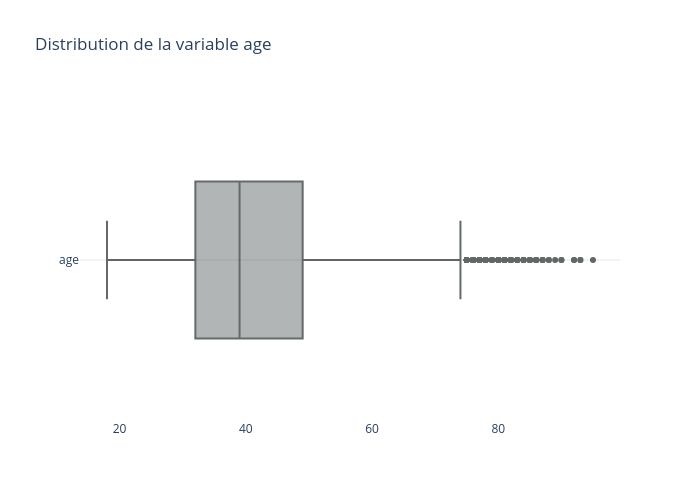

Graphique enregistré sous build/graphs/graph_distrib_var_num_age.png
Distribution cohérente, concentrée autour de la médiane, pas de valeurs aberrantes.


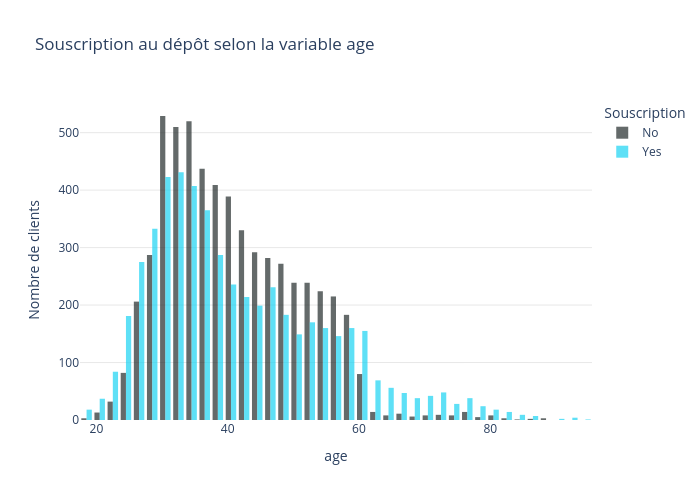

Graphique enregistré sous build/graphs/graph_histo_deposit_age.png
Nous ne créerons pas de catégories d’âge pour le modèle de Machine Learning. Nous pourrons néanmoins les prévoir pour établir un profil type de clients susceptibles de souscrire un dépôt à terme.
Nous pouvons d’ores et déjà constater que le ratio souscriptions/non-souscriptions est en faveur des prospects âgés de moins de 29 ans ou plus de 60 ans.


Variable  balance


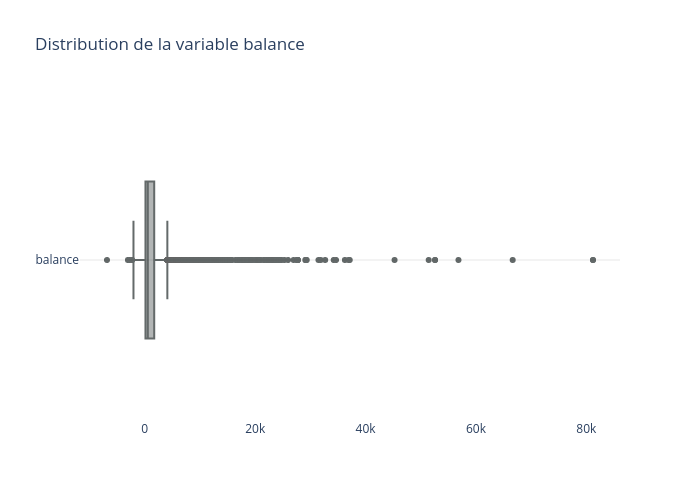

Graphique enregistré sous build/graphs/graph_distrib_var_num_balance.png
Distribution cohérente, concentrée autour de la médiane, pas de valeurs aberrantes.


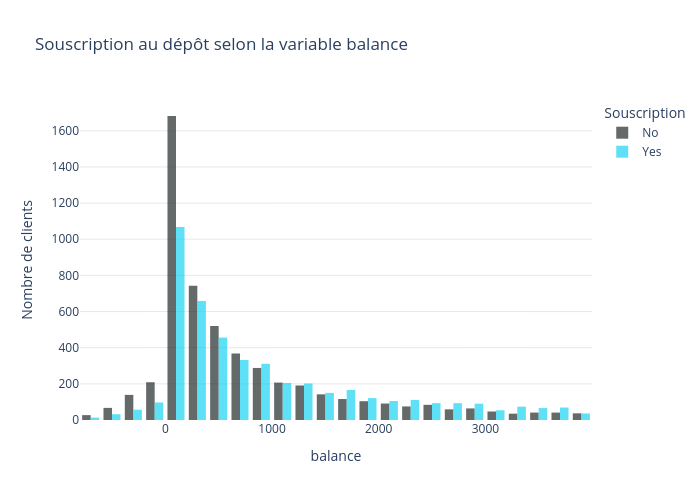

Graphique enregistré sous build/graphs/graph_histo_deposit_balance.png
Nous ne créerons pas de catégories pour le modèle de Machine Learning. Nous pourrons néanmoins les prévoir pour étudier un profil type de clients susceptibles de souscrire un dépôt à terme.
Le ratio souscriptions/non-souscriptions est négatif pour les clients dont le solde bancaire est négatif ou faible (inférieur à 800 euros), ce qui parait plutôt cohérent.


Variable  duration


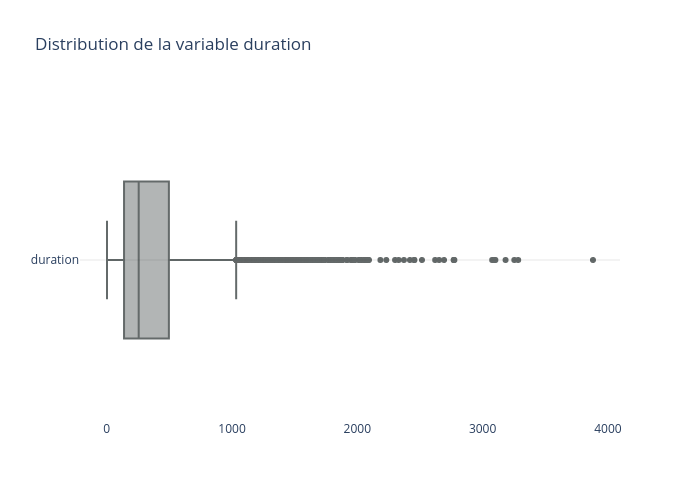

Graphique enregistré sous build/graphs/graph_distrib_var_num_duration.png
En théorie, pour le Machine Learning, une variable doit être connue a priori, ce qui n’est pas le cas de la variable distribution. Nous verrons par la suite, lors de l’interprétation de nos modèles, si cette variable est importante ou non pour la prédiction.
- Si elle figure dans le top 5 des variables utilisées par le modèle, nous la conserverons.
- Sinon, nous la supprimerons pour le Machine Learning, mais nous la conserverons pour émettre des recommandations métier. Cette information peut être utilisée pour valoriser l’intérêt suscité chez le client lors de la campagne passée et l’exploiter pour des prospections futures (plus l’appel était long, plus le client semblait intéressé et donc potentiel prospect pour la prochaine campagne)


Variable  campaign


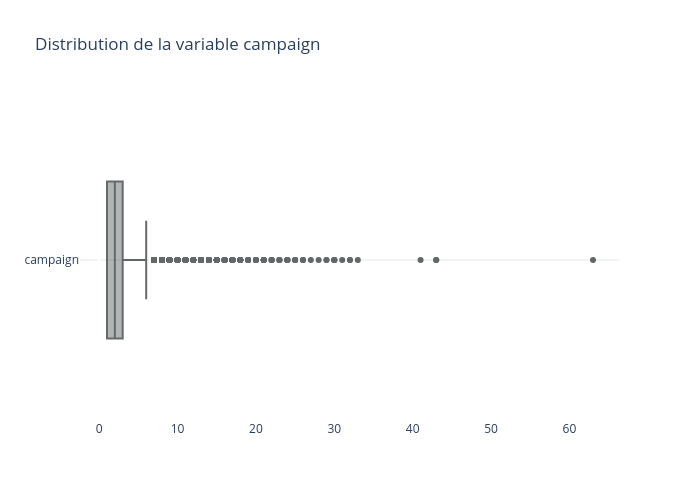

Graphique enregistré sous build/graphs/graph_distrib_var_num_campaign.png


/tmp/ipykernel_10713/3678294027.py:104: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_10713/3678294027.py:111: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



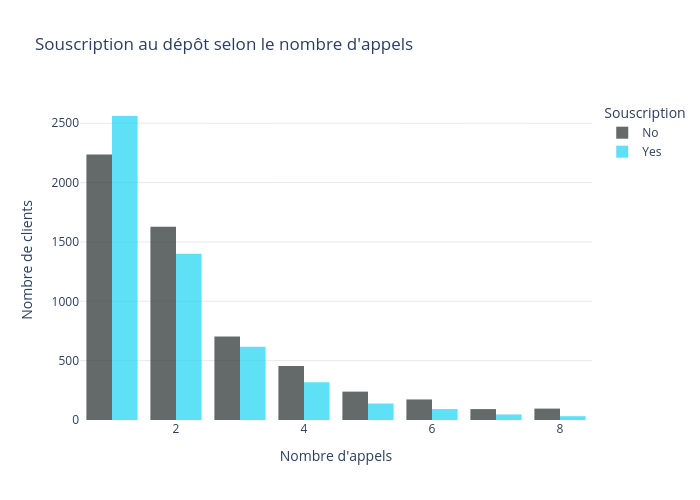

Graphique enregistré sous build/graphs/graph_histo_deposit_campaign.png
Cette information peut être utilisée en complément d’un travail de profiling, pour adapter la méthode d’approche. En l’occurrence, le ratio gain (souscription) / perte (effort fourni pour le démarchage) semble ne plus être intéressant au-delà d’un appel.


Variable  pdays


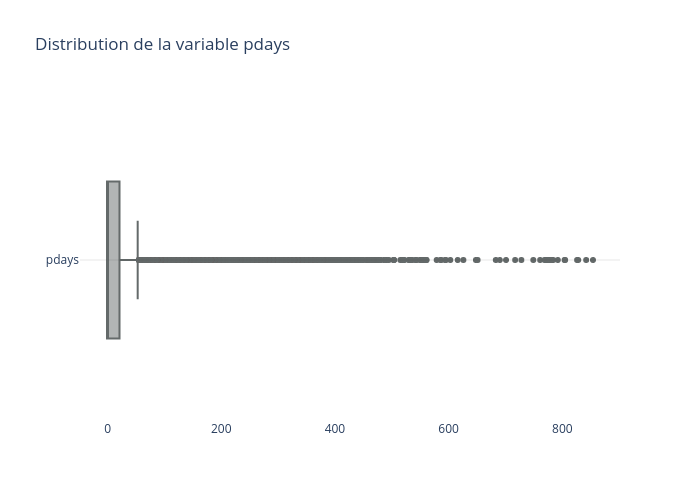

Graphique enregistré sous build/graphs/graph_distrib_var_num_pdays.png


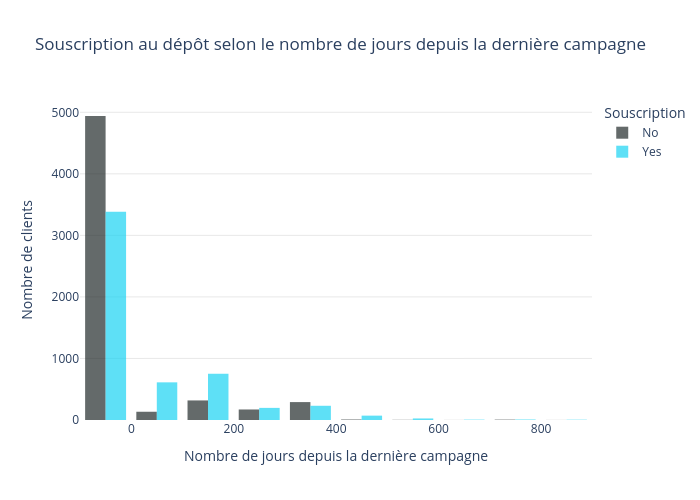

Graphique enregistré sous build/graphs/graph_histo_deposit_pdays.png
--------------------------------------------------------
Valeurs prises par pdays quand poutcome est unknown :
 pdays
-1      8324
 188       1
 98        1
Name: count, dtype: int64
--------------------------------------------------------
Valeurs prises par poutcome quand pdays est -1 :
 poutcome
unknown    8324
Name: count, dtype: int64
--------------------------------------------------------
Il y a beaucoup de lignes dont pdays est égal à -1. Pour tous les pdays à -1, poutcome est « unknown » (8 324 valeurs). Pour poutcome à « unknown » (8 863 valeurs au total), pdays varie entre -1 et 391.
Nous posons le postulat de départ suivant : pdays à -1 et donc par déduction poutcome à « unknown » indique que le client n’a jamais été contacté auparavant pour une campagne précédente. Il s’agit de nouveaux prospects.


Variable  previous


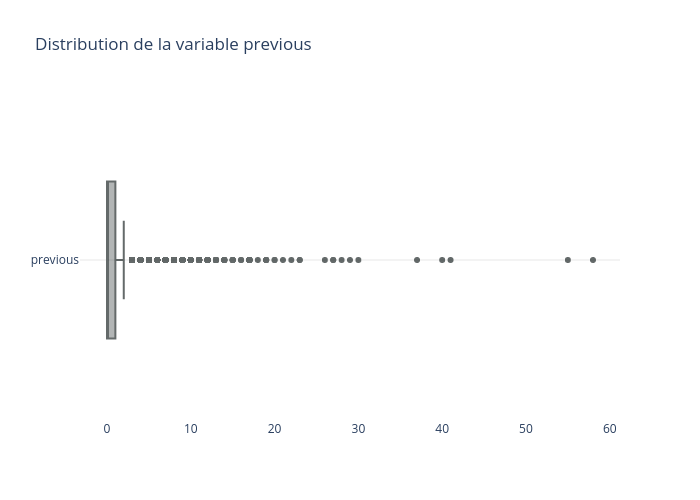

Graphique enregistré sous build/graphs/graph_distrib_var_num_previous.png


/tmp/ipykernel_10713/3678294027.py:170: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_10713/3678294027.py:177: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



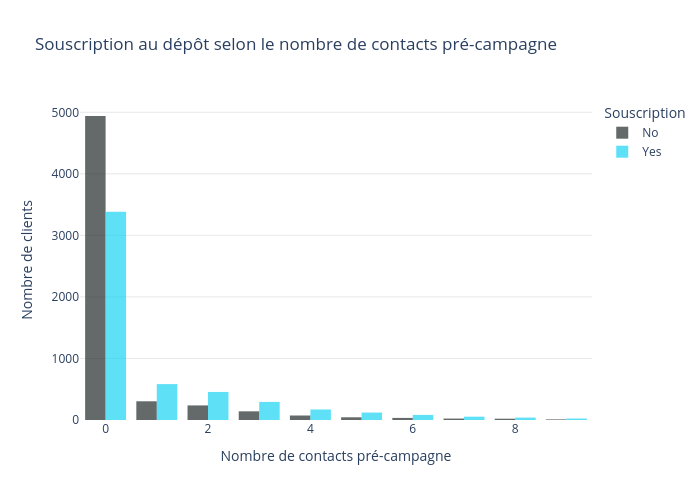

Graphique enregistré sous build/graphs/graph_histo_deposit_previous.png
Une grande partie des souscriptions lors de cette campagne ont été réalisées par des nouveaux prospects. Néanmoins, le ratio souscription/non-souscription est plus intéressant pour les clients ayant déjà été contactés lors de précédentes campagnes marketing.


In [31]:
var_num = ["age","balance","duration","campaign","pdays","previous"]
var_cat = ["job","marital","education","default","housing","loan","contact","day","month","poutcome","deposit"]

def creation_png_deposit(var, histo_var_deposit):
    full_path = build_graphs_path / f"graph_histo_deposit_{var}.png"
    histo_var_deposit.write_image(full_path)
    display(Image(filename=full_path))
    print("Graphique enregistré sous", full_path)

# Boxplot de distribution des variables quantitatives
for var in var_num:
    print("\n")
    print("Variable ", var)
    fig_num = go.Figure()
    fig_num.add_trace(go.Box(
        x=df_bank[var],
        name=var,
        marker_color="#222A2A",
        opacity=0.7
        ))
    fig_num.update_layout(
        title=("Distribution de la variable " + var),
        plot_bgcolor="rgba(0,0,0,0)",
        xaxis=dict(showgrid=False),
        yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
        )
#    fig_num.show("notebook") 
    full_path = build_graphs_path / f"graph_distrib_var_num_{var}.png"
    fig_num.write_image(full_path)
    display(Image(filename=full_path))
    print("Graphique enregistré sous", full_path)
    if var == "age":
        print("Distribution cohérente, concentrée autour de la médiane, pas de valeurs aberrantes.")
#       Histogramme age / deposit
        fig_var_num_deposit = go.Figure()
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=75
            ))
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=75
            ))
        fig_var_num_deposit.update_layout(
            title="Souscription au dépôt selon la variable " + var,
            xaxis_title=var,
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_var_num_deposit.show("notebook")
        creation_png_deposit(var, fig_var_num_deposit)
        print("Nous ne créerons pas de catégories d’âge pour le modèle de Machine Learning. Nous pourrons néanmoins les prévoir pour établir un profil type de clients susceptibles de souscrire un dépôt à terme.")
        print("Nous pouvons d’ores et déjà constater que le ratio souscriptions/non-souscriptions est en faveur des prospects âgés de moins de 29 ans ou plus de 60 ans.")
    if var == "balance":
        print("Distribution cohérente, concentrée autour de la médiane, pas de valeurs aberrantes.")
#       Histogramme balance / deposit
        fig_var_num_deposit = go.Figure()
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[(df_bank["deposit"] == "no") & (df_bank["balance"] > -800) & (df_bank["balance"] < 4000)][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=25
            ))
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[(df_bank["deposit"] == "yes") & (df_bank["balance"] > -800) & (df_bank["balance"] < 4000)][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=25
            ))
        fig_var_num_deposit.update_layout(
            title="Souscription au dépôt selon la variable " + var,
            xaxis_title=var,
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_var_num_deposit.show("notebook")
        creation_png_deposit(var, fig_var_num_deposit)
        print("Nous ne créerons pas de catégories pour le modèle de Machine Learning. Nous pourrons néanmoins les prévoir pour étudier un profil type de clients susceptibles de souscrire un dépôt à terme.")
        print("Le ratio souscriptions/non-souscriptions est négatif pour les clients dont le solde bancaire est négatif ou faible (inférieur à 800 euros), ce qui parait plutôt cohérent.")
    if var == "duration":
        print("En théorie, pour le Machine Learning, une variable doit être connue a priori, ce qui n’est pas le cas de la variable distribution. Nous verrons par la suite, lors de l’interprétation de nos modèles, si cette variable est importante ou non pour la prédiction.")
        print("- Si elle figure dans le top 5 des variables utilisées par le modèle, nous la conserverons.") 
        print("- Sinon, nous la supprimerons pour le Machine Learning, mais nous la conserverons pour émettre des recommandations métier. Cette information peut être utilisée pour valoriser l’intérêt suscité chez le client lors de la campagne passée et l’exploiter pour des prospections futures (plus l’appel était long, plus le client semblait intéressé et donc potentiel prospect pour la prochaine campagne)")
    if var == "campaign":
#       Histogramme campaign / deposit
        fig_var_num_deposit = go.Figure()
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"][df_bank["campaign"] <= 8][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=8
            ))
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"][df_bank["campaign"] <= 8][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=8
            ))
        fig_var_num_deposit.update_layout(
            title="Souscription au dépôt selon le nombre d'appels",
            xaxis_title="Nombre d'appels",
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_var_num_deposit.show("notebook")
        creation_png_deposit(var, fig_var_num_deposit)
        print("Cette information peut être utilisée en complément d’un travail de profiling, pour adapter la méthode d’approche. En l’occurrence, le ratio gain (souscription) / perte (effort fourni pour le démarchage) semble ne plus être intéressant au-delà d’un appel.")
    if var == "pdays":
#       Histogramme pdays / deposit
        fig_var_num_deposit = go.Figure()
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=10
            ))
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=10
            ))
        fig_var_num_deposit.update_layout(
            title="Souscription au dépôt selon le nombre de jours depuis la dernière campagne",
            xaxis_title="Nombre de jours depuis la dernière campagne",
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_var_num_deposit.show("notebook")
        creation_png_deposit(var, fig_var_num_deposit)
        print(separation)
        print("Valeurs prises par pdays quand poutcome est unknown :\n", (df_bank.loc[df_bank["poutcome"] == "unknown"]["pdays"].value_counts()))
        print(separation)
        print("Valeurs prises par poutcome quand pdays est -1 :\n", (df_bank.loc[df_bank["pdays"] == -1]["poutcome"].value_counts()))
        print(separation)
        print("Il y a beaucoup de lignes dont pdays est égal à -1. Pour tous les pdays à -1, poutcome est « unknown » (8 324 valeurs). Pour poutcome à « unknown » (8 863 valeurs au total), pdays varie entre -1 et 391.")
        print("Nous posons le postulat de départ suivant : pdays à -1 et donc par déduction poutcome à « unknown » indique que le client n’a jamais été contacté auparavant pour une campagne précédente. Il s’agit de nouveaux prospects.")
    if var == "previous":
#       Histogramme previous / deposit
        fig_var_num_deposit = go.Figure()
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"][df_bank["previous"]<10][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=10
            ))
        fig_var_num_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"][df_bank["previous"]<10][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=10
            ))
        fig_var_num_deposit.update_layout(
            title="Souscription au dépôt selon le nombre de contacts pré-campagne",
            xaxis_title="Nombre de contacts pré-campagne",
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_var_num_deposit.show("notebook")
        creation_png_deposit(var, fig_var_num_deposit)
        print("Une grande partie des souscriptions lors de cette campagne ont été réalisées par des nouveaux prospects. Néanmoins, le ratio souscription/non-souscription est plus intéressant pour les clients ayant déjà été contactés lors de précédentes campagnes marketing.")



Variable  job


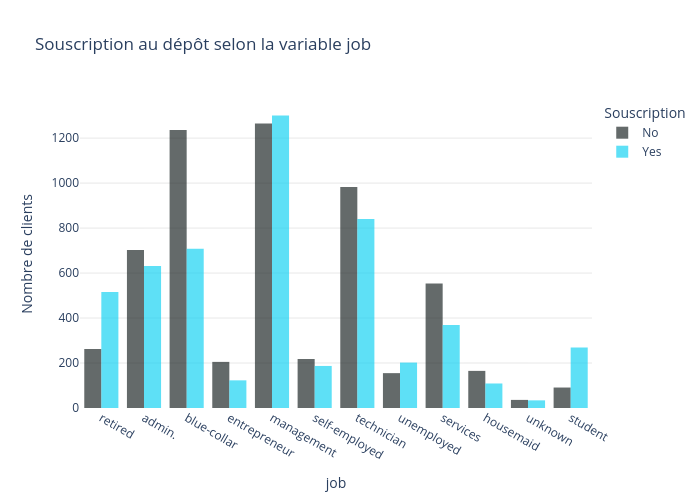

Graphique enregistré sous build/graphs/graph_histo_deposit_job.png
La variable job comprend très peu de valeurs « unknown » (70 lignes pour une volumétrie totale de plus de 11 000 lignes). Etant donné le faible impact de ces lignes, nous pouvons simplement les supprimer.
Les retraités et étudiants semblent le plus sensibles à la question du dépôt à terme. Cela conforte notre analyse basée sur l’âge (moins de 29 ans et plus de 60 ans).


Variable  marital


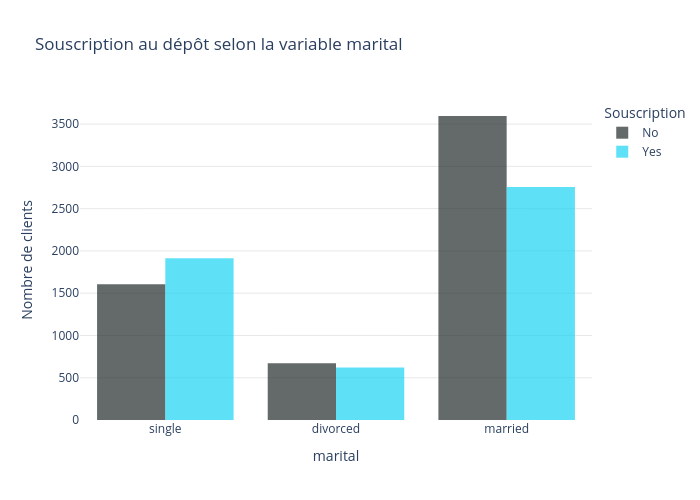

Graphique enregistré sous build/graphs/graph_histo_deposit_marital.png
Les clients mariés semblent moins enclins à souscrire un dépôt à terme suite à une campagne marketing. Les célibataires seront de meilleures cibles.


Variable  education


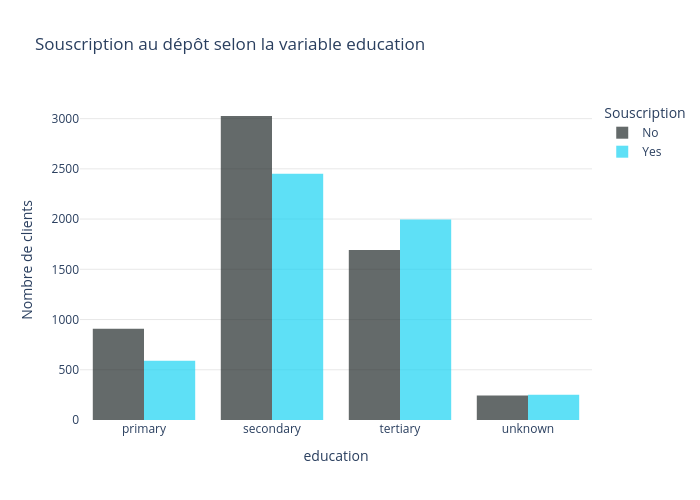

Graphique enregistré sous build/graphs/graph_histo_deposit_education.png
Les clients issus d’études tertiaires semblent plus intéressés par la souscription d’un dépôt à terme.


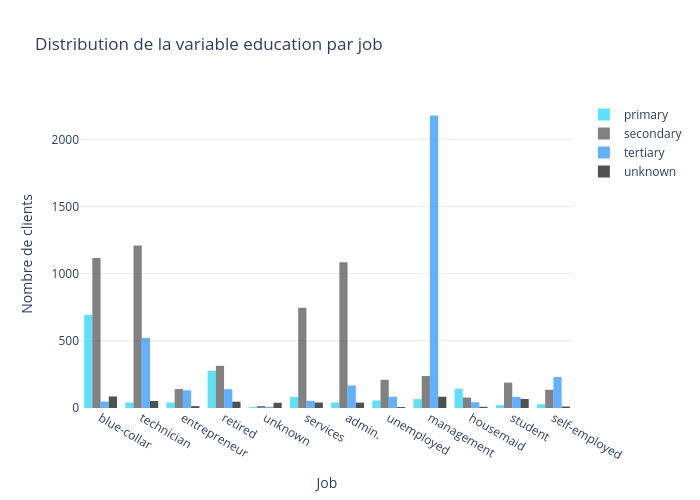

Graphique enregistré sous build/graphs/graph_histo_educ_par_job.png
Les variables job et educations semblent corrélées entre elles. Pour chaque job, une donnée education semble ressortir clairement de manière générale.
Le résultat est plus mitigé pour les retraités et entrepreneurs, mais le nombre de clients issus de ces catégories semble suffisamment faible pour pouvoir en faire abstraction.
Nous pouvons donc en conclure que la variable education, lorsqu’elle est manquante dans le dataset, peut être déduite de la variable job.
Modalités les plus fréquentes de education par job :
{'admin.': 'secondary', 'technician': 'secondary', 'services': 'secondary', 'management': 'tertiary', 'retired': 'secondary', 'blue-collar': 'secondary', 'unemployed': 'secondary', 'entrepreneur': 'secondary', 'housemaid': 'primary', 'unknown': 'unknown', 'self-employed': 'tertiary', 'student': 'secondary'}


Variable  default


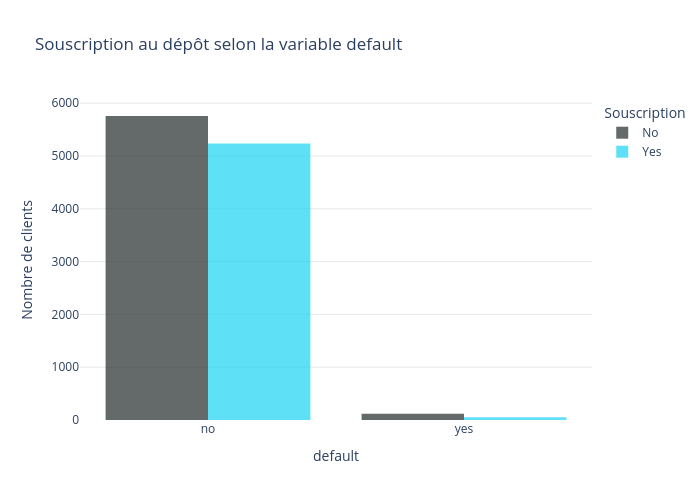

Graphique enregistré sous build/graphs/graph_histo_deposit_default.png
Il y a un fort déséquilibre dans la répartition des données : très peu de clients ayant un crédit en défaut sont présents dans le dataset.


Variable  housing


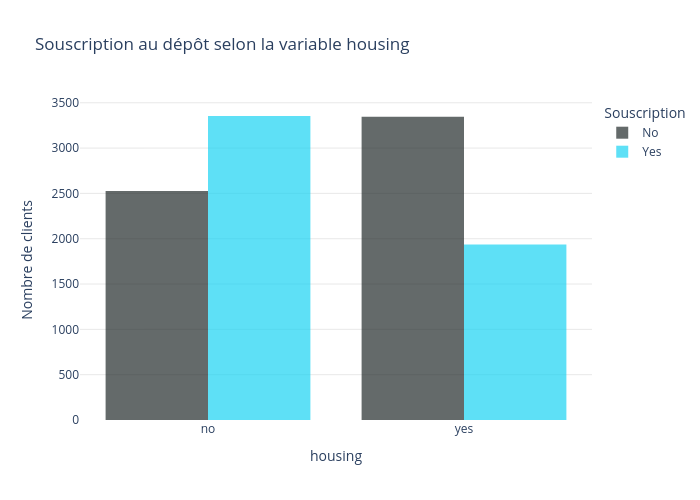

Graphique enregistré sous build/graphs/graph_histo_deposit_housing.png
Ne pas avoir de crédit immobilier en cours semble favoriser la souscription d’un dépôt à terme.


Variable  loan


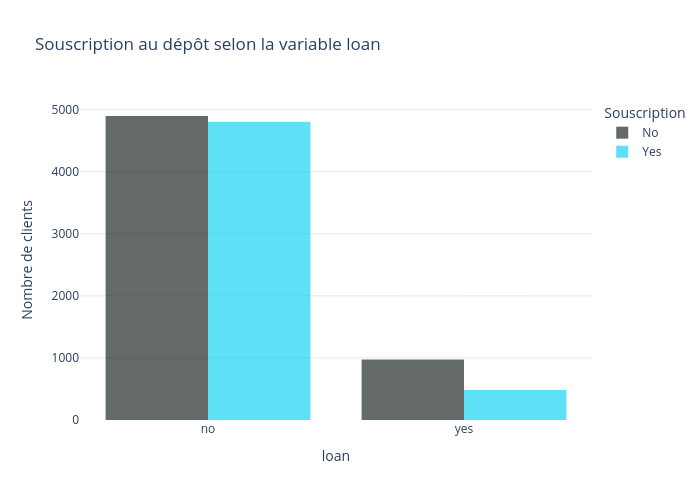

Graphique enregistré sous build/graphs/graph_histo_deposit_loan.png
Il a peu de clients ayant un crédit personnel en cours dans le dataset.
Néanmoins il semblerait qu’un client ayant un crédit personnel en cours soit moins enclin à souscrire un dépôt à terme.


Variable  contact


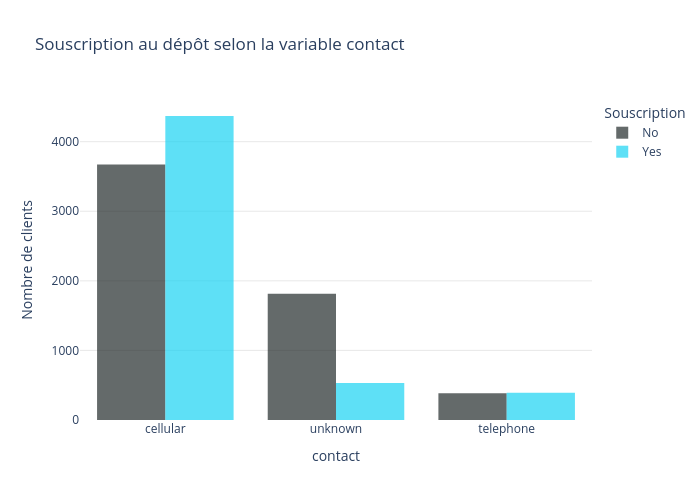

Graphique enregistré sous build/graphs/graph_histo_deposit_contact.png
Proportion largement majoritaire de téléphones mobiles, la catégorie « unknown » emporte beaucoup de non-souscriptions. Dans une société où le téléphone portable prime largement sur la ligne fixe et où un certain nombre de ménages ne disposent même pas d’un téléphone fixe et fonctionnent uniquement par téléphone portable, on peut se poser la question de la pertinence de cette variable. Nous faisons le choix de la supprimer du dataset.


Variable  day


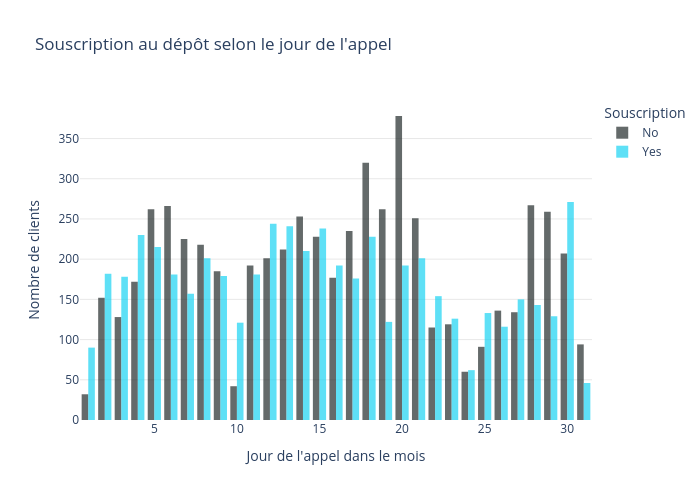

Graphique enregistré sous build/graphs/graph_histo_deposit_day.png
Certains jours du mois semblent plus favorables au démarchage : les 4 premiers jours du mois, le 10 et le 30 de chaque mois.


Variable  month


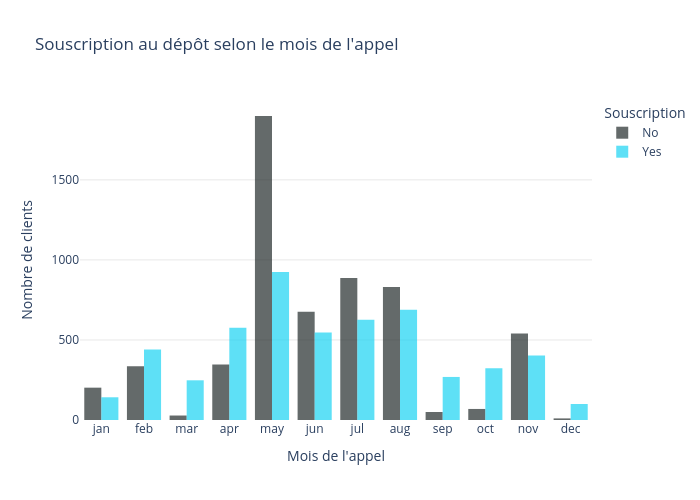

Graphique enregistré sous build/graphs/graph_histo_deposit_month.png
On peut d’ores et déjà constater que les mois les plus propices au démarchage sont mars, avril, septembre, octobre, décembre. Au contraire, les démarchages ayant lieu en mai donnent de très mauvais retours. Ce mois est celui qui fait l'objet du plus grand nombre de prospections pendant cette campagne, tout en ayant le taux de conversion le plus faible de l'année.


Variable  poutcome


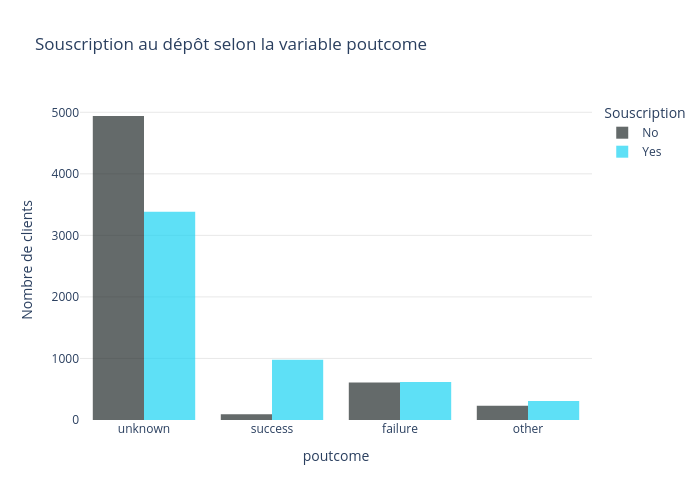

Graphique enregistré sous build/graphs/graph_histo_deposit_poutcome.png
Il y a beaucoup de clients pour lesquels nous ne connaissons pas l’issue de la campagne précédente. D’après notre analyse de la variable pdays combinée à la variable poutcome, poutcome à « unknown » nous donne une information à part entière : il s’agit là de nouveaux prospects, jamais contactés auparavant. Nous décidons donc de conserver les 4 catégories de valeurs telles qu’elles sont dans la base de données initiale.


Variable  deposit


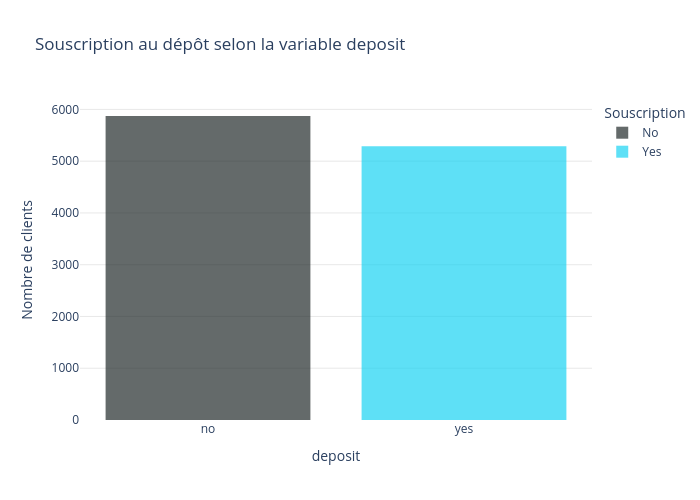

Graphique enregistré sous build/graphs/graph_histo_deposit_deposit.png
La variable deposit est notre variable cible. Sa distribution est très équilibrée, et elle ne comprend aucune valeur manquante. Elle ne nécessite donc aucun retraitement.


In [32]:
jobs_education = {}
for element in df_bank["job"].unique():
    selection_job = df_bank.loc[df_bank["job"]== element]
    valeurs_job = selection_job["education"].value_counts()
    mode_job = selection_job["education"].mode()[0]
    jobs_education[element] = mode_job
    
# Histogramme de distribution des variables catégorielles
for var in var_cat:
    print("\n")
    print("Variable ", var)
#   Histogramme variable catégorielle / deposit
    if var not in ("day", "month"):
        fig_var_cat_deposit = go.Figure()
        fig_var_cat_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=12
            ))
        fig_var_cat_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=12
            ))
        fig_var_cat_deposit.update_layout(
            title="Souscription au dépôt selon la variable " + var,
            xaxis_title=var,
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_var_cat_deposit.show("notebook")
        creation_png_deposit(var, fig_var_cat_deposit)
    if var == "job":
        print("La variable job comprend très peu de valeurs « unknown » (70 lignes pour une volumétrie totale de plus de 11 000 lignes). Etant donné le faible impact de ces lignes, nous pouvons simplement les supprimer.")
        print("Les retraités et étudiants semblent le plus sensibles à la question du dépôt à terme. Cela conforte notre analyse basée sur l’âge (moins de 29 ans et plus de 60 ans).")
    if var == "education":
        print("Les clients issus d’études tertiaires semblent plus intéressés par la souscription d’un dépôt à terme.")
#       Répartition job par niveau d'éducation
        colors = ["#19D3F3", "#4B4B4B", "#1E90FF", "#060808"]
        category_order = ["primary", "secondary", "tertiary", "unknown"]
        fig_educ_job = go.Figure()
        for i, education in enumerate(category_order):
            if education in df_bank["education"].unique():
                fig_educ_job.add_trace(go.Histogram(
                x=df_bank[df_bank["education"] == education]["job"],
                name=education,
                marker_color=colors[i],
                opacity=0.7
                ))
        fig_educ_job.update_layout(
            title="Distribution de la variable education par job",
            xaxis_title="Job",
            yaxis_title="Nombre de clients",
            barmode="group",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)"),
            showlegend=True
            )
#        fig_educ_job.show("notebook")
        full_path = build_graphs_path / f"graph_histo_educ_par_job.png"
        fig_educ_job.write_image(full_path)
        display(Image(filename=full_path))
        print("Graphique enregistré sous", full_path)
        print("Les variables job et educations semblent corrélées entre elles. Pour chaque job, une donnée education semble ressortir clairement de manière générale.")
        print("Le résultat est plus mitigé pour les retraités et entrepreneurs, mais le nombre de clients issus de ces catégories semble suffisamment faible pour pouvoir en faire abstraction.")
        print("Nous pouvons donc en conclure que la variable education, lorsqu’elle est manquante dans le dataset, peut être déduite de la variable job.")
        print("Modalités les plus fréquentes de education par job :")
        print(jobs_education)
    if var == "marital":
        print("Les clients mariés semblent moins enclins à souscrire un dépôt à terme suite à une campagne marketing. Les célibataires seront de meilleures cibles.")
    if var == "default":
            print("Il y a un fort déséquilibre dans la répartition des données : très peu de clients ayant un crédit en défaut sont présents dans le dataset.")
    if var == "housing":
        print("Ne pas avoir de crédit immobilier en cours semble favoriser la souscription d’un dépôt à terme.")
    if var == "loan":
        print("Il a peu de clients ayant un crédit personnel en cours dans le dataset.")
        print("Néanmoins il semblerait qu’un client ayant un crédit personnel en cours soit moins enclin à souscrire un dépôt à terme.")
    if var == "contact":
        print("Proportion largement majoritaire de téléphones mobiles, la catégorie « unknown » emporte beaucoup de non-souscriptions. Dans une société où le téléphone portable prime largement sur la ligne fixe et où un certain nombre de ménages ne disposent même pas d’un téléphone fixe et fonctionnent uniquement par téléphone portable, on peut se poser la question de la pertinence de cette variable. Nous faisons le choix de la supprimer du dataset.")
    if var == "day":
#       Histogramme deposit / jour de l'appel
        fig_day_deposit = go.Figure()
        fig_day_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"][var],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=31
            ))
        fig_day_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"][var],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=31
            ))
        fig_day_deposit.update_layout(
            title="Souscription au dépôt selon le jour de l'appel",
            xaxis_title="Jour de l'appel dans le mois",
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            xaxis=dict(showgrid=False),
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)")
            )
#        fig_day_deposit.show("notebook")
        creation_png_deposit(var, fig_day_deposit)
        print("Certains jours du mois semblent plus favorables au démarchage : les 4 premiers jours du mois, le 10 et le 30 de chaque mois.")
    if var == "month":
#       Histogramme deposit / mois de l'appel
#       Création d'un ordre calendaire pour clarifier le graphique suivant
        month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        df_bank['month'] = pd.Categorical(df_bank['month'], categories=month_order, ordered=True)
        df_bank['month_numeric'] = df_bank['month'].cat.codes
        fig_month_deposit = go.Figure()
        fig_month_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "no"]['month_numeric'],
            name="No",
            marker_color="#222A2A",
            opacity=0.7,
            nbinsx=len(month_order)
            ))
        fig_month_deposit.add_trace(go.Histogram(
            x=df_bank[df_bank["deposit"] == "yes"]['month_numeric'],
            name="Yes",
            marker_color="#19D3F3",
            opacity=0.7,
            nbinsx=len(month_order)
            ))
        fig_month_deposit.update_layout(
            title="Souscription au dépôt selon le mois de l'appel",
            xaxis_title="Mois de l'appel",
            yaxis_title="Nombre de clients",
            barmode="group",
            legend_title="Souscription",
            plot_bgcolor="rgba(0,0,0,0)",
            yaxis=dict(gridcolor="rgba(210,210,210,0.5)"),
            xaxis=dict(showgrid=False, 
                tickvals=list(range(len(month_order))),
                ticktext=month_order
                )
            )
#        fig_month_deposit.show("notebook")
        creation_png_deposit(var, fig_month_deposit)
        print("On peut d’ores et déjà constater que les mois les plus propices au démarchage sont mars, avril, septembre, octobre, décembre. Au contraire, les démarchages ayant lieu en mai donnent de très mauvais retours. Ce mois est celui qui fait l'objet du plus grand nombre de prospections pendant cette campagne, tout en ayant le taux de conversion le plus faible de l'année.")
    if var == "poutcome":
        print("Il y a beaucoup de clients pour lesquels nous ne connaissons pas l’issue de la campagne précédente. D’après notre analyse de la variable pdays combinée à la variable poutcome, poutcome à « unknown » nous donne une information à part entière : il s’agit là de nouveaux prospects, jamais contactés auparavant. Nous décidons donc de conserver les 4 catégories de valeurs telles qu’elles sont dans la base de données initiale.")
    if var == "deposit":
        print("La variable deposit est notre variable cible. Sa distribution est très équilibrée, et elle ne comprend aucune valeur manquante. Elle ne nécessite donc aucun retraitement.")

Récapitulatif des informations dont nous disposons sur les différentes variables du dataset :

In [33]:
df_pertinence = pd.read_csv(donnees_path / 'tableau_variables.csv', sep = ";", index_col=0, lineterminator="\n")
display(df_pertinence)

,Description,Type info.,Taux de NaN,Distribution des valeurs,Type de variable,Commentaire / Retraitements à réaliser
Nom de la colonne,,,,,,
age,âge du client lors du dépôt,int64,0 %,de 18 à 95 ans avec une concentration entre 32...,quantitative,Distribution cohérente mais très concentrée au...
job,métier pratiqué,object,1 %,['admin.' 'technician' 'services' 'management'...,catégorielle,"70 lignes « unknown », impact dérisoire étant ..."
marital,statut marital,object,0 %,['married' 'single' 'divorced'],catégorielle,NaN
education,niveau d'études,object,4 %,['secondary' 'tertiary' 'primary' 'unknown'],catégorielle,497 lignes « unknown » ;\nContrôle des valeurs...
default,le crédit est-il en défaut ?,object,0 %,['yes' 'no'],catégorielle,Très peu de défauts de crédit dans le dataset
balance,solde bancaire annuel moyen,int64,0 %,de -6847 à 81 204 euros avec une concentration...,quantitative,"Distribution concentrée autour de la médiane, ..."
housing,le client bénéficie-t-il d’un crédit immobilier ?,object,0 %,['yes' 'no'],catégorielle,NaN
loan,le client bénéficie-t-il d’un prêt personnel ?,object,0 %,['yes' 'no'],catégorielle,Très peu de prêts personnels dans le dataset
contact,moyen de contacter le client,object,21 %,['unknown' 'cellular' 'telephone'],catégorielle,Donnée peu pertinente : proportion beaucoup pl...


In [34]:
display(Markdown(txt_conclusion_prepocess))

#### Conclusions sur les variables du dataset

Nous disposons d’ores et déjà de certaines informations nous permettant de cibler nos futurs prospects. Il semblerait que notre prospect idéal soit :
* âgé de moins de 29 ans ou plus de 60 ans,
* célibataire,
* étudiant ou retraité
* issu un cursus d’études du domaine tertiaire
* ayant quelques économies personnelles
* n’ayant aucun crédit en cours
* ayant déjà été contacté lors d’une campagne précédente mais ayant eu lieu il y a moins de 200 jours
* ayant souscrit un produit lors de la campagne précédente.

Nos analyses macro font également ressortir quelques recommandations métier. Les méthodes d’approche à privilégier sont les suivantes :
* contact par appel téléphonique sur une ligne mobile
* avant le 5 du mois ou alors le 10 ou le 30 du mois
* en mars, avril, septembre, octobre ou décembre
* un seul appel par prospect

Pour affiner nos analyses et réussir à prédire si un prospect serait susceptible de souscrire ou non à un dépôt à terme, nous devons passer à l’étape de la modélisation. Néanmoins, avant cela, nous devons procéder aux retraitements suivants :
* age : créer des catégories pour faciliter le traitement
* job : 1% de valeurs "unknown"(soit 70 lignes), nous avons pris la décision de supprimer ces lignes qui sont peu nombreuses
* education : 4% de valeurs "unknown" (soit 497 lignes), cette variable est importante et ces lignes sont trop nombreuses pour être supprimées. Nous avons donc décidé de compléter les valeurs manquantes. La variable education étant fortement corrélée avec la variable job, nous déduirons les données manquantes du job associé (modalité education la plus fréquente pour le job en question)
* contact : 21% de valeurs "unknown". Après analyse nous avons décidé de supprimer cette colonne qui ne représente pas d'intérêt majeur pour la modélisation.

Pour rappel : la variable poutcome restera inchangée.
En effet, cette variable comporte trop de valeurs manquantes pour pouvoir supprimer des lignes (75% de valeurs "unknown").
De plus, nous avons acté qu'elle était importante pour notre modélisation.
La valeur "unknown" de cette variable constituera donc une valeur à part entière dans notre projet.


### MODELISATION DU PROJET

In [35]:
display(Markdown(txt_classif_choix))

#### Classification du problème

Comme nous l’avons vu précédemment, la variable la plus importante de notre jeu de données est la variable binaire « deposit » qui indique si le prospect a finalement souscrit ou non un dépôt à terme suite à la campagne marketing. Après les différents retraitements opérés lors de la phase de pré-processing, nous disposons de 15 variables explicatives et d’1 variable cible de nature catégorielle.

Nous devons donc mettre en place un modèle d’apprentissage supervisé suivant la technique de la classification (prédiction d’une variable cible de type qualitatif).

Nous avons choisi de nettoyer le dataset avant la modélisation car il y avait peu de données à retraiter et que ces retraitements auront peu d'impact sur la suite de notre projet :
* suppression d'une colonne (contact),
* suppression de seulement 70 lignes pour valeur job manquante,
* et remplacement des 427 valeurs manquantes restantes d'education (70 des valeurs manquantes ayant été supprimées avec la suppression des lignes dont job était manquant).

Le dataset ne présentant pas un grand volume, nous ne réduirons pas sa dimension lors de la modélisation.

Nous diviserons les données en deux parties : étant donné que nous disposons d'un dataset d'un volume correct (plus de 10 000 entrées), 70% du dataset seront dédiés à l’entraînement et 30% du dataset seront dédiés à l’évaluation de notre modèle.

**Choix de la métrique de performance**

Selon la classification de notre projet (modèle supervisé de classification), nous pouvons retenir 4 principales métriques de performance : l’exactitude, la précision, le rappel et le score F1.

* **L'exactitude (accuracy en anglais)** évalue le taux de bonnes prédictions par rapport au nombre total de prédictions. Elle est facile à calculer, facile à interpréter, et résume la performance du modèle avec une valeur unique. Elle évalue mal les performances d’un modèle basé sur des données déséquilibrées, mais ce n'est pas le cas dans notre projet. Cependant, l’exactitude ne permet pas de faire des nuances entre les différentes prédictions et néglige de ce fait le coût des faux négatifs. Notre choix se portera donc sur une métrique plus précise.
* **La précision** est une métrique qui répond à la question : Parmi toutes les prédictions positives du modèle, combien sont de vrais positifs ? Un score de précision élevé nous informe que le modèle ne classe pas aveuglément toutes les observations comme positives. Cette métrique est utile lorsque le coût des faux positifs est élevé.
* **Le rappel (recall en anglais)** est une métrique qui quantifie la proportion d'observations réellement positives qui ont été correctement classifiées positives par le modèle (vrai positifs par rapport à la somme des vrais positifs et faux négatifs). Un score de rappel élevé nous informe que le modèle est capable de bien détecter les observations réellement positives. Cette métrique est utile lorsque le coût des faux négatifs est élevé.
* **Le score F1 (F1-score en anglais)** est une métrique qui permet de combiner la précision et le rappel, puisqu'elle correspond à leur moyenne harmonique.

C'est cette dernière métrique, **le score F1**, qui nous parait la plus adaptée pour évaluer nos différents modèles de Machine Learning.

#### Choix du modèle et optimisation

**Choix de l'encodage**

Notre jeu de données ne comporte plus de valeurs manquantes mais contient encore des données quantitatives extrêmes. Nous avons décidé de les conserver car ces informations ne sont pas aberrantes et restent intéressantes pour notre modèle. Nous ne pouvons pas normaliser ou standardiser les variables concernées car ces techniques sont sensibles aux valeurs extrêmes. Nous devrons en revanche tester s’il est pertinent de les mettre à l’échelle par la technique de Robust Scaling. Les variables concernées sont : age, balance, duration, campaign, pdays, previous.

Les variables catégorielles, quant à elles, devront être encodées de la manière suivante :
* job : OneHotEncoding
* marital : OneHotEncoding
* education : Ordinal Encoding ou OneHotEncoding
* default : OneHotEncoding
* housing : OneHotEncoding
* loan : OneHotEncoding
* day : OneHotEncoding
* month : OneHotEncoding
* poutcome : OneHotEncoding
* deposit : LabelEncoding

**Choix des modèles**

Les modèles que nous avons testé sont les suivants :
* Régression logistique (LogiticRegression)
* Machines à Vecteurs de Support (SVC)
* Méthode des K plus proches voisins (KNN - KNeighborsClassifier)
* Arbres de décision (DecisionTreeClassifier et DecisionTreeRegressor)
* Forêts aléatoires (RandomForestClassifier)
* Gradient Boosting (GradientBoostingClassifier)
* Extreme Gradient Boosting (XGBClassifier)
* CatBoosting (CatBoostClassifier)

**Tests réalisés**

Nous avons testé nos modèles avec différents paramètres :
* avec / sans la variable duration
* avec / sans mise à l'échelle des variables numériques (Robust Scaling)
* avec Ordinal Encoding / OneHotEncoding pour la variable education
* avec / sans optimisation des hyperparamètres

**Construction des modèles**

Nous avons tenté de faire ressortir les variables les plus importantes utilisées par nos différents modèles pour décider du sort de la variable duration. Cependant, nous avons été confrontés à une limite : Les modèles KNN et SVM ne disposent pas de l'attribut feature_importances_ ou coef_. Etant donné qu’il ne s’agit pas des modèles les plus performants et que la grande majorité des modèles dispose de ces attributs, nous avons basé nos analyses sur les résultats disponibles en faisant abstraction des éléments manquants.

**Optimisation des hyperparamètres**

Pour optimiser les hyperparamètres, nous avons fait appel à la méthode GridSearch : celle-ci explore toutes les combinaisons possibles d'hyperparamètres spécifiés pour trouver les meilleurs réglages du modèle.

Nous avons également testé RandomizedSearch et BayerSearch, mais sans résultats probants, bien au contraire. Malgré des tests très longs sur ces hyperparamètres extrêmement lourds à faire tourner même en local, les résultats se trouvaient être moins bons qu'avec GridSearch. Nous avons donc décidé de ne pas intégrer ces tests à notre rapport.

Nous avons testé l'optimisation des hyperparamètres sur la quasi-totalité des modèles sélectionnés. Ces tests ont été réalisés en local car ils sont relativement lourds selon les modèles. Pour éviter de surcharger la plateforme Streamlit et ainsi perdre en efficacité, nous ne présenterons l'optimisation des paramètres que pour les 3 modèles qui nous semblent être les plus performants, à savoir : CatBoosting, Extreme Gradient Boosting et Forêts aléatoires.

**Optimisation du chargement des modèles entraînés**

Enfin, dans le but d'optimiser encore davantage la rapidité de notre plateforme Steamlit, nous avons utilisé le module Pickle. Il s’agit d’une bibliothèque standard de Python qui permet de sérialiser et désérialiser des objets. Elle permet de convertir des objets Python en un format binaire qui peut être enregistré sur le disque et récupéré ultérieurement, ce qui en fait un outil extrêmement utile pour la sauvegarde et la restauration de modèles de machine learning. 

Concrètement, nous avons entraîné en local chacun de nos modèles, l’un après l’autre, en modifiant les paramètres selon nos différents angles d’étude. Pour chaque test réalisé, le module pickle nous a permis de sauvegarder le modèle entraîné ainsi que les meilleurs hyperparamètres utilisés le cas échéant. Seuls ces fichiers sont chargés dans Streamlit, les différents modèles n’ont pas à être réentrainés pour visualiser les résultats de nos tests. Notre plateforme est ainsi plus réactive et plus efficace dans la livraison des résultats des tests.


In [36]:
# RETRAITEMENTS POUR GENERER df_bank_0 (Base utilisée uniquement pour le profiling)

# Création d'un dataframe df_bank_0 copie de df_bank :
df_bank_0 = df_bank.copy()

# Création d'une fonction qui définit la catégorie d'âge sur la base de "age":
def get_categ(age):
	if age <= 31:
		categ = "extreme_bas"
	elif 31 < age <= 40:
		categ = "jeune"
	elif 30 < age <= 49:
		categ = "moins_jeune"
	elif 49 < age:
		categ = "extreme_haut"
	return categ
    
df_bank_0["age_categ"] = df_bank_0["age"].apply(get_categ)

# Export du dataframe df_bank_1 en fichier .csv
df_bank_0.to_csv(build_df_path / 'bank_0_profiling.csv', index=False, sep=',')

In [37]:
# RETRAITEMENTS POUR GENERER df_bank_1 (retraitements minimalistes)

# Suppression des lignes dont la valeur "job" est manquante :
df_bank_1 = df_bank.loc[df_bank["job"] != "unknown"]

# Remplacement des unknown de "education" par la modalité la plus fréquente rencontrée pour un "job" identique :
df_bank_1.loc[df_bank_1["education"] == "unknown", "education"] = df_bank_1.loc[df_bank_1["education"] == "unknown", "job"].map(jobs_education)		

print("Valeurs prises par la variable job après retraitement :\n", df_bank_1["job"].value_counts())
print(separation)

print("Valeurs prises par la variable education après retraitement :\n", df_bank_1["education"].value_counts())
print(separation)

# Suppression de la colonne "contact" :
df_bank_1 = df_bank_1.drop("contact", axis=1)

print("Apercu de la structure du dataframe df_bank_1 après retraitements :")
print(df_bank_1.info())

# Export du dataframe df_bank_1 en fichier .csv
df_bank_1.to_csv(build_df_path / 'bank_1.csv', index=False, sep=',')

Valeurs prises par la variable job après retraitement :
 job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64
--------------------------------------------------------
Valeurs prises par la variable education après retraitement :
 education
secondary    5815
tertiary     3775
primary      1502
Name: count, dtype: int64
--------------------------------------------------------
Apercu de la structure du dataframe df_bank_1 après retraitements :
<class 'pandas.core.frame.DataFrame'>
Index: 11092 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            11092 non-null  int64   
 1   job            11092 non-null  object  
 2   marital        11092 non-null  object  
 3   ed

In [38]:
# RETRAITEMENTS SUPPLEMENTAIRES POUR GENERER df_bank_2 (sans duration)

# Suppression de la colonne "duration" :
df_bank_2 = df_bank_1.drop("duration", axis=1)
# Export du dataframe df_bank_2 en fichier .csv
df_bank_2.to_csv(build_df_path / 'bank_2.csv', index=False, sep=',')

print("Apercu de la structure du dataframe df_bank_2 après retraitements :")
print(df_bank_2.info())

Apercu de la structure du dataframe df_bank_2 après retraitements :
<class 'pandas.core.frame.DataFrame'>
Index: 11092 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            11092 non-null  int64   
 1   job            11092 non-null  object  
 2   marital        11092 non-null  object  
 3   education      11092 non-null  object  
 4   default        11092 non-null  object  
 5   balance        11092 non-null  int64   
 6   housing        11092 non-null  object  
 7   loan           11092 non-null  object  
 8   day            11092 non-null  int64   
 9   month          11092 non-null  category
 10  campaign       11092 non-null  int64   
 11  pdays          11092 non-null  int64   
 12  previous       11092 non-null  int64   
 13  poutcome       11092 non-null  object  
 14  deposit        11092 non-null  object  
 15  month_numeric  11092 non-null  int8    
dtypes: category(1

In [39]:
# Mise en place du tronc commun à tous nos tests de machine learning

le = LabelEncoder()
ohe = OneHotEncoder(drop = "first")
oe = OrdinalEncoder(categories = [["primary", "secondary", "tertiary"]])
num_scaler = RobustScaler()

models = {
        "Logistic Regression": LogisticRegression(max_iter = 1000),
        "SVM": SVC(),
        "KNN" : neighbors.KNeighborsClassifier(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Decision Tree Regressor": DecisionTreeRegressor(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boost" : GradientBoostingClassifier(),
        "Extreme Gradient Boost" : XGBClassifier(),
        "CatBoost" : CatBoostClassifier(silent = True)  # 'silent=True' pour éviter les logs
        }

# Définition des hyperparamètres à tester pour chaque modèle
param_grid = {
#            'Logistic Regression': {
#                            'C': [0.01, 0.1, 1, 10, 100],
#                            'solver': ['liblinear', 'lbfgs'],
#                            'max_iter': [100, 200, 1000]
#                            },
#            'Decision Tree Classifier': {
#                            'max_depth': [None, 5, 10, 20],
#                            'min_samples_split': [2, 5, 10]
#                            },
#            'Decision Tree Regressor': {
#                            'max_depth': [None, 5, 10, 20, 30],
#                            'min_samples_split': [2, 5, 10, 20],
#                            'min_samples_leaf': [1, 2, 4],
#                            },
            'Random Forest': {
                            'n_estimators': [50, 100, 200],
                            'max_depth': [None, 5, 10, 20],
                            'min_samples_split': [2, 5, 10]
                            },
#            'Gradient Boost': {
#                            'n_estimators': [50, 100, 200],
#                            'learning_rate': [0.01, 0.1, 0.2],
#                            'max_depth': [3, 5, 7]
#                            },
#            'SVM': {
#                            'C': [0.01, 0.1, 1, 10, 100],
#                            'kernel': ['linear', 'rbf']
#                            },
#            'KNN': {
#                            'n_neighbors': [3, 5, 7, 10],
#                            'weights': ['uniform', 'distance']
#                            },
            'Extreme Gradient Boost': {
                            'n_estimators': [100, 200, 300],
                            'learning_rate': [0.01, 0.1, 0.2],
                            'max_depth': [3, 5, 7]
                            },
            'CatBoost': {
                            'iterations': [100, 200, 300],
                            'learning_rate': [0.01, 0.1, 0.2],
                            'depth': [6, 8, 10]
                            }
            }


#Version plus complète des hyperparamètres :
#param_grid = {
#            'Logistic Regression': {
#                            'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                            'solver': ['liblinear', 'lbfgs', 'saga'],
#                            'penalty': ['l2', 'l1'],
#                            'max_iter': [100, 200, 1000]
#                            },
#    
#            'Decision Tree Classifier': {
#                            'max_depth': [None, 5, 10, 20, 30], 
#                            'min_samples_split': [2, 5, 10, 20],
#                            'min_samples_leaf': [1, 2, 4],
#                            'criterion': ['gini', 'entropy']
#                            },
#    
#            'Decision Tree Regressor': {
#                            'max_depth': [None, 5, 10, 20, 30],
#                            'min_samples_split': [2, 5, 10, 20],
#                            'min_samples_leaf': [1, 2, 4],
#                            'criterion': ['mse', 'friedman_mse']
#                            },
#    
#            'Random Forest': {
#                            'n_estimators': [100, 200, 500],
#                            'max_depth': [None, 10, 20, 30],
#                            'min_samples_split': [2, 5, 10],
#                            'min_samples_leaf': [1, 2, 4],
#                            'bootstrap': [True, False]
#                            },
#    
#            'Gradient Boost': {
#                            'n_estimators': [100, 200, 500],
#                            'learning_rate': [0.001, 0.01, 0.1, 0.2],
#                            'max_depth': [3, 5, 7, 10],
#                            'subsample': [0.8, 1.0],
#                            'min_samples_split': [2, 5, 10]
#                            },
#    
#            'SVM': {
#                            'C': [0.01, 0.1, 1, 10, 100, 1000],
#                            'kernel': ['linear', 'rbf', 'poly'],
#                            'gamma': ['scale', 'auto'],
#                            'degree': [2, 3, 4],
#                            'class_weight': ['balanced', None]
#                            },
#    
#            'KNN': {
#                            'n_neighbors': [3, 5, 7, 9, 11],
#                            'weights': ['uniform', 'distance'],
#                            'metric': ['euclidean', 'manhattan', 'minkowski']
#                            },
#    
#            'Extreme Gradient Boost': {
#                            'n_estimators': [100, 200, 500],
#                            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#                            'max_depth': [3, 5, 7, 10],
#                            'colsample_bytree': [0.8, 1.0],
#                            'subsample': [0.8, 1.0],
#                            'gamma': [0, 0.1, 0.2]
#                            },
#    
#            'CatBoost': {
#                            'iterations': [100, 200, 500],
#                            'learning_rate': [0.01, 0.1, 0.2],
#                            'depth': [4, 6, 8, 10],
#                            'l2_leaf_reg': [1, 3, 5],
#                            'border_count': [32, 64, 128]
#                        }
#            }

#### Choisissez le test à lancer :

In [40]:
# Choisissez le test à lancer :
num_test = 6

"""
    Attribuer à num_test la valeur du test souhaité
    Catégorie de test et valeurs possibles de num_test :
        1 : avec la variable duration / sans Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres 
        2 : avec la variable duration / avec Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres
        3 : sans la variable duration / sans Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres
        4 : sans la variable duration / avec Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres
        5 : sans la variable duration / avec Robust Scaling / OneHotEncoding pour education / sans optimisation des hyperparamètres 
        6 : sans la variable duration / avec Robust Scaling / Ordinal Encoding pour education / avec optimisation des hyperparamètres 
        7 : avec la variable duration / sans Robust Scaling / OneHotEncoding pour education / sans optimisation des hyperparamètres 
        8 : avec la variable duration / avec Robust Scaling / OneHotEncoding pour education / sans optimisation des hyperparamètres
        9 : avec la variable duration / sans Robust Scaling / Ordinal Encoding pour education / avec optimisation des hyperparamètres 
        10 : avec la variable duration / avec Robust Scaling / Ordinal Encoding pour education / avec optimisation des hyperparamètres
        11 : avec la variable duration / sans Robust Scaling / OneHotEncoding pour education / avec optimisation des hyperparamètres 
        12 : sans la variable duration / avec Robust Scaling / OneHotEncoding pour education / avec optimisation des hyperparamètres
        13 : sans la variable duration / sans Robust Scaling / Ordinal Encoding pour education / avec optimisation des hyperparamètres
        14 : sans la variable duration / sans Robust Scaling / OneHotEncoding pour education / sans optimisation des hyperparamètres
        15 : sans la variable duration / sans Robust Scaling / OneHotEncoding pour education / avec optimisation des hyperparamètres
        16 : avec la variable duration / avec Robust Scaling / OneHotEncoding pour education / avec optimisation des hyperparamètres
"""

'\n    Attribuer à num_test la valeur du test souhaité\n    Catégorie de test et valeurs possibles de num_test :\n        1 : avec la variable duration / sans Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres \n        2 : avec la variable duration / avec Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres\n        3 : sans la variable duration / sans Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres\n        4 : sans la variable duration / avec Robust Scaling / Ordinal Encoding pour education / sans optimisation des hyperparamètres\n        5 : sans la variable duration / avec Robust Scaling / OneHotEncoding pour education / sans optimisation des hyperparamètres \n        6 : sans la variable duration / avec Robust Scaling / Ordinal Encoding pour education / avec optimisation des hyperparamètres \n        7 : avec la variable duration / sans Robust Scaling / OneHotEncodin

Modèle testé : Logistic Regression
Variables les plus importantes du modèle  Logistic Regression


,Variables,Coefficient,Importance
62,categorical_ohe__poutcome_success,1.915901,1.915901
56,categorical_ohe__month_mar,1.164196,1.164196
53,categorical_ohe__month_jan,-1.054909,1.054909
57,categorical_ohe__month_may,-1.011971,1.011971
51,categorical_ohe__month_dec,1.007954,1.007954


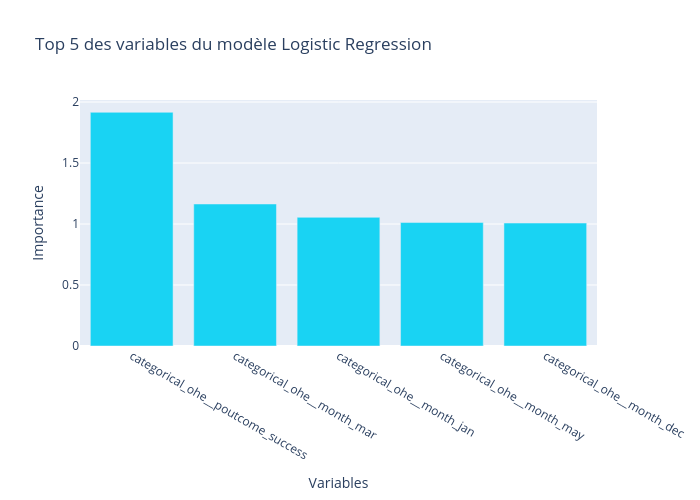

Graphique enregistré sous build/graphs/graph_var_imp_Logistic Regression.png
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : SVM
Variables les plus importantes du modèle  SVM
Ce modèle ne possède pas d'attribut feature_importances_ ou coef_
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : KNN
Variables les plus importantes du modèle  KNN
Ce modèle ne possède pas d'attribut feature_importances_ ou coef_
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : Decision Tree Classifier
Variables les plus importantes du modèle  Decision Tree Classifier


,Variables,Importance
1,numerical__balance,0.200066
0,numerical__age,0.132671
62,categorical_ohe__poutcome_success,0.080938
2,numerical__campaign,0.050164
3,numerical__pdays,0.039012


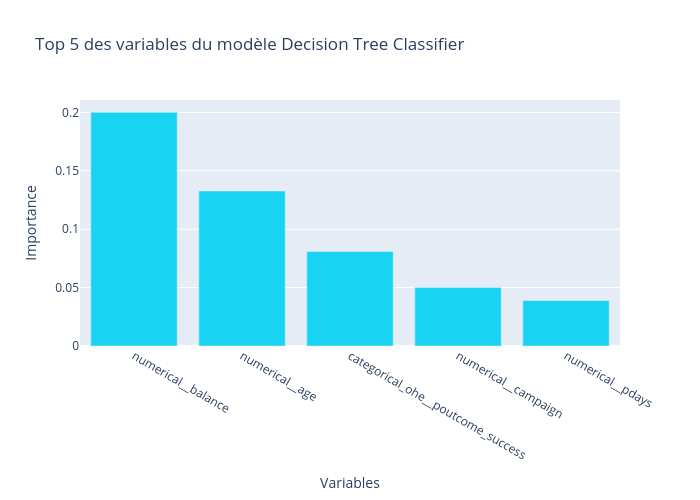

Graphique enregistré sous build/graphs/graph_var_imp_Decision Tree Classifier.png
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : Decision Tree Regressor
Variables les plus importantes du modèle  Decision Tree Regressor


,Variables,Importance
1,numerical__balance,0.197089
0,numerical__age,0.131432
62,categorical_ohe__poutcome_success,0.080938
2,numerical__campaign,0.052097
3,numerical__pdays,0.036285


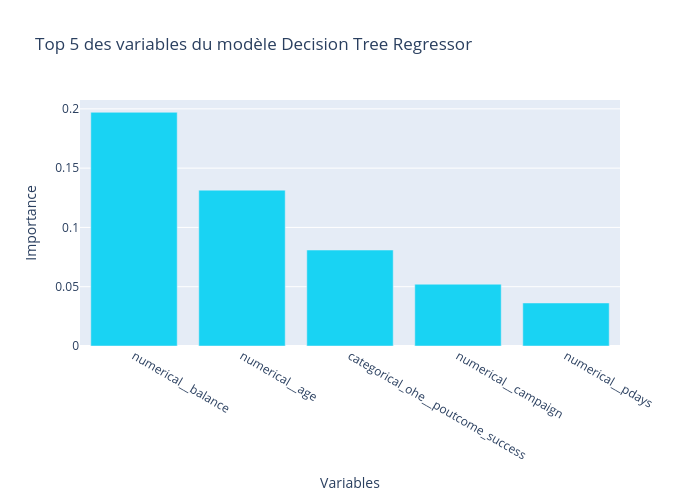

Graphique enregistré sous build/graphs/graph_var_imp_Decision Tree Regressor.png
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : Random Forest
Variables les plus importantes du modèle  Random Forest


,Variables,Importance
1,numerical__balance,0.122378
0,numerical__age,0.116199
62,categorical_ohe__poutcome_success,0.061904
3,numerical__pdays,0.050968
2,numerical__campaign,0.048058


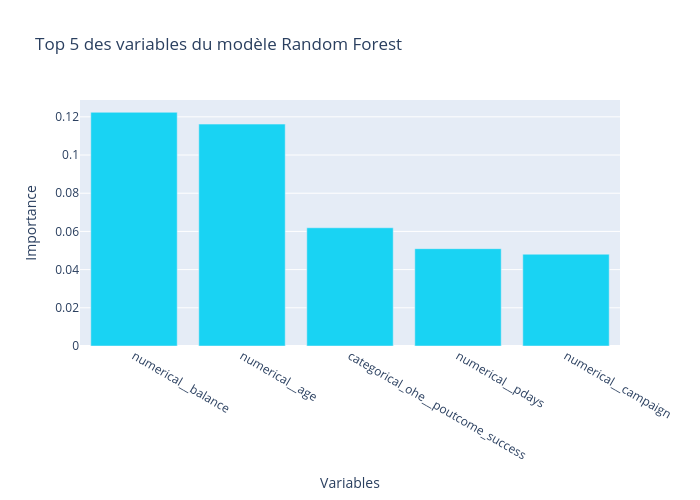

Graphique enregistré sous build/graphs/graph_var_imp_Random Forest.png
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : Gradient Boost
Variables les plus importantes du modèle  Gradient Boost


,Variables,Importance
62,categorical_ohe__poutcome_success,0.275610
0,numerical__age,0.113695
18,categorical_ohe__housing_yes,0.101986
3,numerical__pdays,0.080005
1,numerical__balance,0.076002


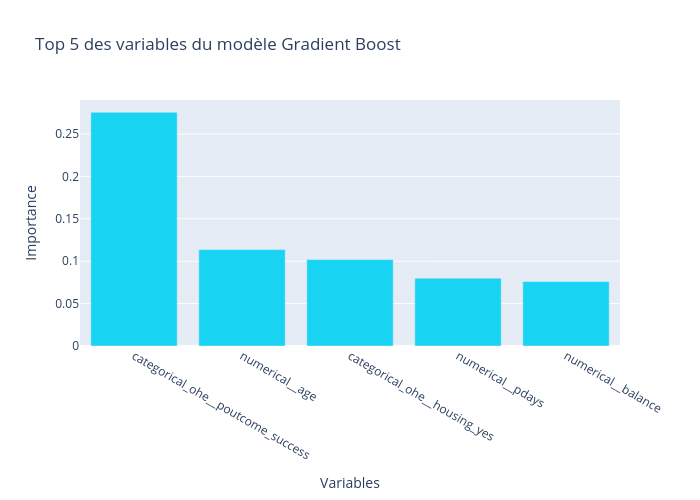

Graphique enregistré sous build/graphs/graph_var_imp_Gradient Boost.png
L'interprétabilité n'a pas été réalisée pour ce test.
--------------------------------------------------------
Modèle testé : Extreme Gradient Boost
Variables les plus importantes du modèle  Extreme Gradient Boost


,Variables,Importance
62,categorical_ohe__poutcome_success,0.237151
56,categorical_ohe__month_mar,0.075272
18,categorical_ohe__housing_yes,0.046355
59,categorical_ohe__month_oct,0.044093
60,categorical_ohe__month_sep,0.024756


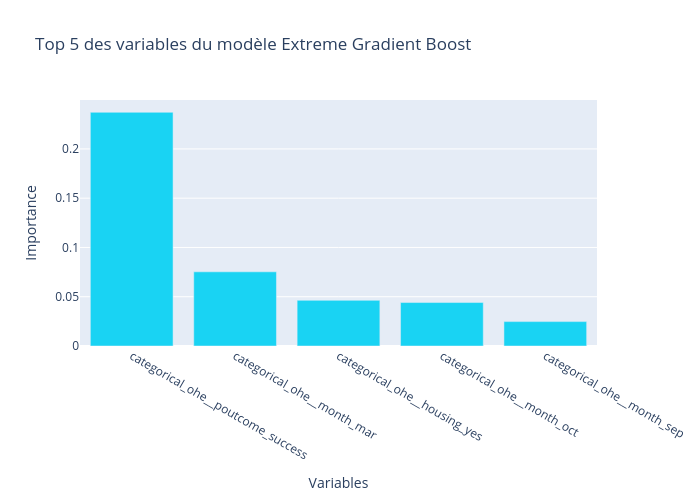

Graphique enregistré sous build/graphs/graph_var_imp_Extreme Gradient Boost.png
Interprétabilité avec SHAP


,Variables,Importance SHAP
0,categorical_ohe__poutcome_success,0.249717
1,numerical__age,0.232804
2,categorical_ohe__month_may,0.217707
3,numerical__pdays,0.211780
4,numerical__balance,0.210129


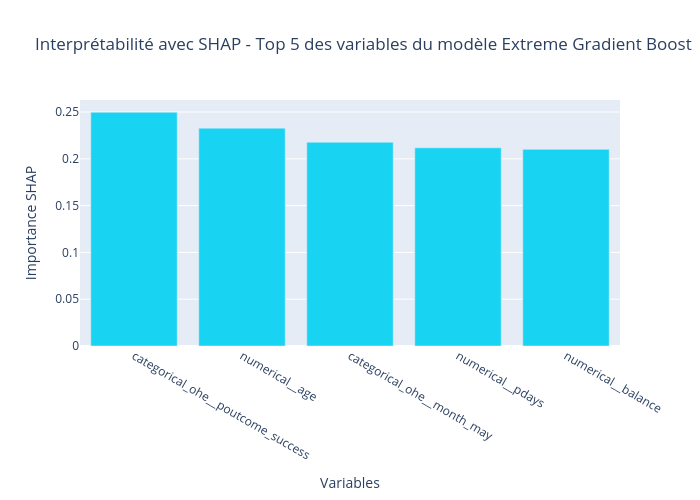

Graphique enregistré sous build/graphs/graph_var_shap_Extreme Gradient Boost.png
--------------------------------------------------------
Modèle testé : CatBoost
Variables les plus importantes du modèle  CatBoost


,Variables,Importance
0,numerical__age,12.168841
1,numerical__balance,11.446051
62,categorical_ohe__poutcome_success,8.432761
3,numerical__pdays,7.862294
2,numerical__campaign,5.462149


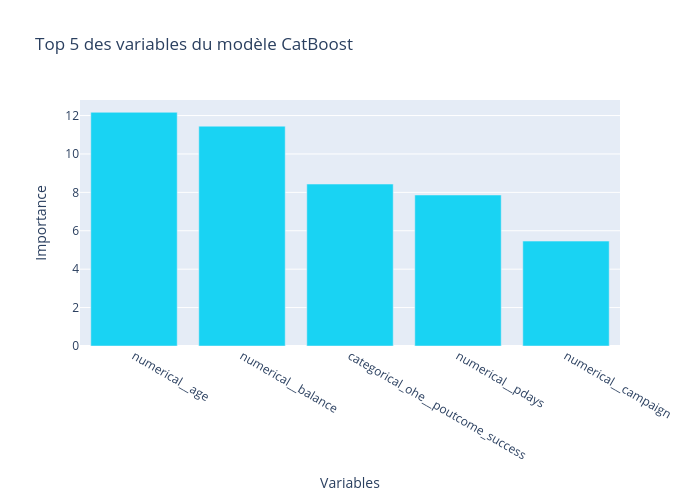

Graphique enregistré sous build/graphs/graph_var_imp_CatBoost.png
Interprétabilité avec SHAP


,Variables,Importance SHAP
0,categorical_ohe__poutcome_success,0.272909
1,categorical_ohe__housing_yes,0.229980
2,numerical__age,0.220156
3,categorical_ohe__month_may,0.199456
4,numerical__balance,0.195477


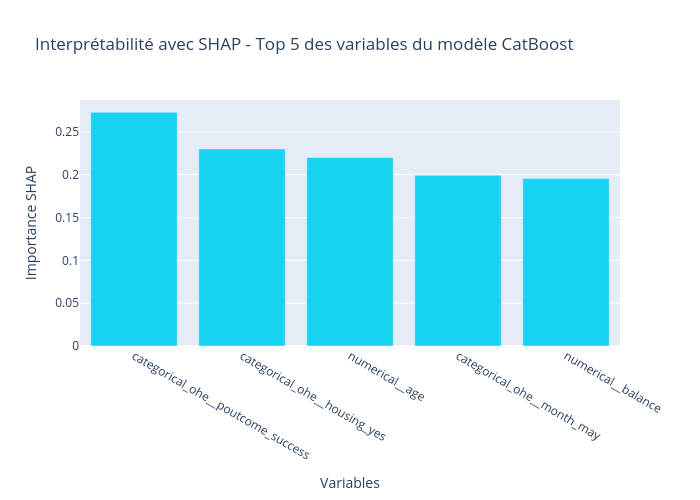

Graphique enregistré sous build/graphs/graph_var_shap_CatBoost.png
--------------------------------------------------------
Récapitulatif des meilleurs hyperparamètres
--------------------------------------------------------
Récapitulatif des performances des différents modèles
(selon les paramètres choisis précédemment)


,Modèle,Précision,Rappel,Score F1
0,Logistic Regression,0.752706,0.572877,0.650594
1,SVM,0.788355,0.540558,0.641353
2,KNN,0.669522,0.594423,0.629742
3,Decision Tree Classifier,0.608134,0.596958,0.602494
4,Decision Tree Regressor,0.599365,0.598226,0.598795
5,Random Forest,0.749418,0.612167,0.673875
6,Gradient Boost,0.775124,0.596324,0.674069
7,Extreme Gradient Boost,0.745971,0.615970,0.674766
8,CatBoost,0.758216,0.614068,0.678571


In [49]:
if num_test == 1:
    duration = "avec"
    robustscaling = "sans"
    education = "oe"
    hyperparam = "sans"
elif num_test == 2:
    duration = "avec"
    robustscaling = "avec"
    education = "oe"
    hyperparam = "sans"
elif num_test == 3:
    duration = "sans"
    robustscaling = "sans"
    education = "oe"
    hyperparam = "sans"
elif num_test == 4:
    duration = "sans"
    robustscaling = "avec"
    education = "oe"
    hyperparam = "sans"
elif num_test == 5:
    duration = "sans"
    robustscaling = "avec"
    education = "ohe"
    hyperparam = "sans"
elif num_test == 6:
    duration = "sans"
    robustscaling = "avec"
    education = "oe"
    hyperparam = "avec"
elif num_test == 7:
    duration = "avec"
    robustscaling = "sans"
    education = "ohe"
    hyperparam = "sans"
elif num_test == 8:
    duration = "avec"
    robustscaling = "avec"
    education = "ohe"
    hyperparam = "sans"
elif num_test == 9:
    duration = "avec"
    robustscaling = "sans"
    education = "oe"
    hyperparam = "avec"
elif num_test == 10:
    duration = "avec"
    robustscaling = "avec"
    education = "oe"
    hyperparam = "avec"
elif num_test == 11:
    duration = "avec"
    robustscaling = "sans"
    education = "ohe"
    hyperparam = "avec"
elif num_test == 12:
    duration = "sans"
    robustscaling = "avec"
    education = "ohe"
    hyperparam = "avec"
elif num_test == 13:
    duration = "sans"
    robustscaling = "sans"
    education = "oe"
    hyperparam = "avec"
elif num_test == 14:
    duration = "sans"
    robustscaling = "sans"
    education = "ohe"
    hyperparam = "sans"
elif num_test == 15:
    duration = "sans"
    robustscaling = "sans"
    education = "ohe"
    hyperparam = "avec"
elif num_test == 16:
    duration = "avec"
    robustscaling = "avec"
    education = "ohe"
    hyperparam = "avec"
else:
    print("Veuillez séléctionner un numéro de test valide !")

test_path = build_ml_path / f"test{num_test}" 
test_path.mkdir(exist_ok=True)

if duration == "avec":
    df = df_bank_1
    var_num = ["age","balance","duration","campaign","pdays","previous"]
else:
    df = df_bank_2
    var_num = ["age","balance","campaign","pdays","previous"]

data = df.drop("deposit", axis = 1)
target = df["deposit"]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 88)
if robustscaling == "avec":
    if education == "oe":
        var_cat_for_ohe = ["job","marital","default","housing","loan","day","month","poutcome"]
        prepro = ColumnTransformer(transformers = [("numerical", num_scaler, var_num), ("categorical_ohe", ohe, var_cat_for_ohe), ("categorical_oe", oe, ["education"])])
    else:
        var_cat_for_ohe = ["job","marital", "education","default","housing","loan","day","month","poutcome"]
        prepro = ColumnTransformer(transformers = [("numerical", num_scaler, var_num), ("categorical_ohe", ohe, var_cat_for_ohe)])
else :
    if education == "oe":
        var_cat_for_ohe = ["job","marital","default","housing","loan","day","month","poutcome"]
        prepro = ColumnTransformer(transformers = [("numerical", "passthrough", var_num),("categorical_ohe", ohe, var_cat_for_ohe), ("categorical_oe", oe, ["education"])])
    else : 
        var_cat_for_ohe = ["job","marital", "education","default","housing","loan","day","month","poutcome"]
        prepro = ColumnTransformer(transformers = [("numerical", "passthrough", var_num),("categorical_ohe", ohe, var_cat_for_ohe)])
X_train_prepro = prepro.fit_transform(X_train)
X_test_prepro = prepro.transform(X_test)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
resultats = []
features = {}
best_params_list = {}
for model_name, model in models.items():
    print("Modèle testé : " + model_name)
    model_file = test_path / f"ml_test{num_test}_{model_name}_model.pkl"
    params_file = test_path / f"ml_test{num_test}_{model_name}_best_params.pkl"
    if model_file.exists():
        with open(model_file, "rb") as f:
            model = pickle.load(f)
        y_pred_train = model.predict(X_train_prepro)
        y_pred_test = model.predict(X_test_prepro)
    else:
        if hyperparam == "avec":
            if params_file.exists():
                with open(params_file, "rb") as f:
                    best_params = pickle.load(f)
                best_params_list[model_name] = best_params
            else:
                if model_name in param_grid:  # Si des paramètres sont spécifiés pour ce modèle
                    grid_search = GridSearchCV(estimator=model, param_grid = param_grid[model_name], scoring='f1', cv=5, n_jobs=-1)
                    grid_search.fit(X_train_prepro, y_train)
                    model = grid_search.best_estimator_  # Utiliser les meilleurs paramètres pour le modèle
                    best_params_list[model_name] = grid_search.best_params_  # Sauvegarder les meilleurs paramètres
                    y_pred_train = grid_search.predict(X_train_prepro)
                    y_pred_test = grid_search.predict(X_test_prepro)
#                   print("Hyperparamètres testés pour le modèle ", model_name)
#                   print(f"{model_name}: {params}")
                    print("Meilleurs hyperparamètres pour le modèle ", model_name)
                    print(grid_search.best_params_)
                    with open(params_file, "wb") as f:
                        pickle.dump(best_params_list[model_name], f)
                else:
                    print("Aucun hyperparamètre n'a été optimisé pour ce test.")
                    model.fit(X_train_prepro, y_train)
                    y_pred_train = model.predict(X_train_prepro)
                    y_pred_test = model.predict(X_test_prepro)
        else:
            model.fit(X_train_prepro, y_train)
            y_pred_train = model.predict(X_train_prepro)
            y_pred_test = model.predict(X_test_prepro)
        with open(model_file, "wb") as f:
            pickle.dump(model, f)
    f1 = f1_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    resultats.append({
        "Modèle": model_name,
        "Précision": precision,
        "Rappel": recall,
        "Score F1": f1
        })
    print("Variables les plus importantes du modèle ", model_name)
    nom_var = prepro.get_feature_names_out()
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        data_importances = pd.DataFrame({"Variables" : nom_var, "Importance" : importance}).sort_values(by = "Variables", ascending = False)
        top_data_importances = pd.DataFrame({"Variables" : nom_var, "Importance" : importance}).sort_values(by = "Importance", ascending = False)
        display(top_data_importances.head(5))
        top_data_importances["Color"] = top_data_importances["Variables"].apply(lambda x: "deep_blue" if x == "numerical__duration" else "light_blue")
        fig = px.bar(top_data_importances.head(5), x="Variables", y="Importance", color="Color", color_discrete_map={"deep_blue": "#005780", "light_blue": "#19D3F3"}, title="Top 5 des variables du modèle " + model_name)
        fig.update_layout(showlegend=False)
#        fig.show("notebook")
        full_path = build_graphs_path / f"graph_var_imp_{model_name}.png"
        fig.write_image(full_path)
        display(Image(filename=full_path))
        print("Graphique enregistré sous", full_path)
        for feature, importance in zip(nom_var, importance):
            if feature not in features:
                features[feature] = {}
            features[feature][model_name] = importance
    elif model_name == "Logistic Regression":
#           coef = model.coef_[0]
        coef = model.coef_
        if coef.ndim == 1:  # Si c'est un tableau 1D (ce qui arrive parfois en classification binaire)
            coef = coef.reshape(1, -1)
        coef = coef[0]
        data_importances = pd.DataFrame({"Variables": nom_var, "Coefficient": coef})
        data_importances["Importance"] = data_importances["Coefficient"].abs()
        data_importances = data_importances.sort_values(by = "Variables", ascending = False)
        top_data_importances = data_importances.sort_values(by = "Importance", ascending = False)
        display(top_data_importances.head(5))
        top_data_importances["Color"] = top_data_importances["Variables"].apply(lambda x: "deep_blue" if x == "numerical__duration" else "light_blue")
        fig = px.bar(top_data_importances.head(5), x="Variables", y="Importance", color="Color", color_discrete_map={"deep_blue": "#005780", "light_blue": "#19D3F3"}, title="Top 5 des variables du modèle " + model_name)
        fig.update_layout(showlegend=False)
#        fig.show("notebook")
        full_path = build_graphs_path / f"graph_var_imp_{model_name}.png"
        fig.write_image(full_path)
        display(Image(filename=full_path))
        print("Graphique enregistré sous", full_path)
        for feature, importance in zip(nom_var, data_importances["Importance"]):
            if feature not in features:
                features[feature] = {}
            features[feature][model_name] = importance
    else:
        print("Ce modèle ne possède pas d'attribut feature_importances_ ou coef_")
#   Interprétabilité avec SHAP
    if model_name in ["Extreme Gradient Boost", "CatBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_prepro)
        mean_shap_values = pd.DataFrame(shap_values, columns=nom_var).abs().mean()
#        explainer = shap.Explainer(model, X_train_prepro)
#        shap_values = explainer(X_test_prepro)
#        mean_shap_values = pd.DataFrame(shap_values.values, columns=nom_var).abs().mean()
        top_5_shap = mean_shap_values.nlargest(5)
        top_shap_importances = pd.DataFrame({'Variables': top_5_shap.index, 'Importance SHAP': top_5_shap.values})
        print("Interprétabilité avec SHAP")
        display(top_shap_importances)
        top_shap_importances["Color"] = top_shap_importances["Variables"].apply(lambda x: "deep_blue" if x == "numerical__duration" else "light_blue")
        fig = px.bar(top_shap_importances, x="Variables", y="Importance SHAP", color="Color", color_discrete_map={"deep_blue": "#005780", "light_blue": "#19D3F3"}, title="Interprétabilité avec SHAP - Top 5 des variables du modèle " + model_name)
        fig.update_layout(showlegend=False)
#        fig.show("notebook")
        full_path = build_graphs_path / f"graph_var_shap_{model_name}.png"
        fig.write_image(full_path)
        display(Image(filename=full_path))
        print("Graphique enregistré sous", full_path)
    else:
        print("L'interprétabilité n'a pas été réalisée pour ce test.")
    print(separation)
print("Récapitulatif des meilleurs hyperparamètres")
if hyperparam == "avec":
    for model_name, params in best_params_list.items():
        print(f"{model_name}: {params}")
else:
    print("Aucun hyperparamètre n'a été optimisé pour ces tests.")
print(separation)
recap_resultats = pd.DataFrame(resultats)
print("Récapitulatif des performances des différents modèles")
print("(selon les paramètres choisis précédemment)")
display(recap_resultats)
#print("Importances des variables pour chacun des modèles")
#print("(selon les paramètres choisis précédemment)")
#recap_importances = pd.DataFrame(features).T  # Transposition pour avoir les variables en ligne
#display(recap_importances)

In [ ]:
display(Markdown(txt_interpretation))

#### Interprétation des résultats

La variable duration est restée au centre des débats durant tout le projet :
* Elle prend une place prépondérante dans l’ensemble des analyses.
* Toutefois elle n’est connue qu’à posteriori, ce qui interroge sur son utilisabilité en amont.

En effet, pour les modèles pouvant être analysés grâce à leur attribut feature_importances_ ou coef_, la variable duration se trouve dans le top 5 de 6 d’entre-eux. Son importance dans la qualité des prédictions de machine learning n’est donc pas discutable ; les résultats sont globalement supérieurs de 10 points lorsqu’elle est intégrée aux calculs.
Toutefois, le temps d’appel, à savoir son essence même, ne peut effectivement pas être connu avant d’avoir passé cet appel. Il ne peut donc pas être utilisé pour le calcul du succès ou non d’un appel.

Devant ce dilemme, nous avons pris la décision d’articuler notre analyse autour de ces deux possibilités, pour ne pas décider arbitrairement d’occulter une face importante de notre étude. Ainsi, tous nos modèles de machine learning sont disponibles en conservant ou non la variable duration. Cela nous permet d'optimiser ou non les scores du machine learning selon notre objectif du moment, tout en conservant des données les plus réalistes possibles selon les besoins. Cela entre en parfaite adéquation avec l'objectif final de notre projet, à savoir le conseil métier et l’amélioration de l’efficience des process.

La mise à l'échelle par RobustScaling agit positivement sur les modèles KNN et SVM. Elle est cependant sans incidence significative pour les autres modèles.

Le fait d’encoder la variable education en Ordinal Encoding ou OneHotEncoding semble peu importer. Les résultats sont équivalents avec les 2 méthodes.

L’utilisation d’hyperparamètres ne semble pas avoir d’impact sur nos modèles.

Nous pouvons conclure de tous nos essais que les modèles de base sont très bien optimisés pour l'utilisation dans notre dataset.


### CONCLUSION DU PROJET